In [418]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# read the file from anaconda cloud, just first 10 rows to see if it works
file_name = 'all_ticks_wide.csv.gz'
sample_df = pd.read_csv(file_name, compression='gzip', nrows = 10)
display(sample_df)



timestamp    AEFES   AKBNK    AKSA  AKSEN   ALARK   ALBRK  \
0  2012-09-17T06:45:00Z  22.3978  5.2084  1.7102   3.87  1.4683  1.1356   
1  2012-09-17T07:00:00Z  22.3978  5.1938  1.7066   3.86  1.4574  1.1275   
2  2012-09-17T07:15:00Z  22.3978  5.2084  1.7102    NaN  1.4610  1.1356   
3  2012-09-17T07:30:00Z  22.3978  5.1938  1.7102   3.86  1.4537  1.1275   
4  2012-09-17T07:45:00Z  22.5649  5.2084  1.7102   3.87  1.4574  1.1356   
5  2012-09-17T08:00:00Z  22.5649  5.2229  1.7102   3.86  1.4610  1.1275   
6  2012-09-17T08:15:00Z  22.5649  5.2229  1.7066    NaN  1.4610  1.1275   
7  2012-09-17T08:30:00Z  22.5649  5.2084  1.7066   3.86  1.4610     NaN   
8  2012-09-17T08:45:00Z  22.5649  5.2372  1.6995    NaN  1.4610  1.1275   
9  2012-09-17T09:00:00Z  22.5649  5.2372  1.6995   3.86  1.4610  1.1356   

    ANACM   ARCLK   ASELS   ASUZU   AYGAZ    BAGFS  BANVT   BRISA    CCOLA  \
0  1.0634  6.9909  2.9948  2.4998  3.5396  37.4875   3.95  3.9666  27.2590   
1  1.0634  6.9259  2.9948  2.5100  3.5483  37.2769   3.96  3.9666  27.3471   
2  1.0679  6.9909  2.9855  2.4796  3.5483  37.2769   3.96  3.9356  27.3471   
3  1.0679  6.9584  2.9855  2.4897  3.5396  37.3822   3.95  3.9666  27.4347   
4  1.0725  6.9909  2.9760  2.4897  3.5396  37.4875   3.96  3.9666  27.4347   
5  1.0725  6.9584  2.9760  2.4897  3.5396  37.3822   3.95  3.9666  27.4347   
6  1.0679  6.9584  2.9760  2.4998  3.5483  37.2769   3.96  3.9821  27.3471   
7  1.0725  6.9909  2.9855  2.4897  3.5483  37.1716   3.96  3.9977  27.1710   
8  1.0725  6.9909  2.9855  2.4998  3.5396  37.1716   3.95  3.9821  27.2590   
9  1.0725  6.9909  2.9855  2.4897  3.5483  37.2769   3.95  3.9666  27.2590   

   CEMAS   ECILC   EREGL    FROTO   GARAN   GOODY   GUBRF    HALKB  ICBCT  \
0   1.20  0.8046  0.7914  12.0559  6.3715  1.8479  2.7434  12.9606   0.72   
1   1.19  0.8088  0.7844  11.9592  6.3386  1.8479  2.7541  12.8742   0.72   
2   1.19  0.8088  0.7914  11.8950  6.3386  1.8479  2.7541  12.9174   0.72   
3   1.20  0.8088  0.7914  11.9592  6.3715  1.8648  2.7541  12.9606   0.72   
4   1.20  0.8130  0.7914  11.9914  6.3715  1.8648  2.7541  12.9606   0.73   
5   1.20  0.8172  0.7914  12.0234  6.3715  1.8648  2.7646  12.9606    NaN   
6   1.20  0.8172  0.7914  12.0559  6.3715  1.8648  2.7646  12.9606   0.73   
7   1.20  0.8172  0.7879  12.0234  6.3386  1.8817  2.7541  12.9174   0.72   
8   1.20  0.8130  0.7914  12.0234  6.3715  1.8817  2.7541  12.9606   0.72   
9   1.20  0.8130  0.7879  11.9914  6.3715  1.8817  2.7434  13.0039   0.72   

    ISCTR  ISDMR   ISFIN   ISYAT   KAREL   KARSN   KCHOL   KRDMB   KRDMD  \
0  4.0807    NaN  0.2450  0.2065  1.8469  1.0818  6.0642  1.3738  0.7165   
1  4.0519    NaN  0.2450  0.2065  1.8237  1.0818  6.0475  1.3608  0.7165   
2  4.0519    NaN  0.2422  0.2065  1.8237  1.0726  6.0475  1.3608  0.7165   
3  4.0663    NaN     NaN     NaN  1.8391  1.0726  6.0475  1.3673  0.7104   
4  4.0807    NaN  0.2422  0.2086  1.8314  1.0726  6.0309  1.3608  0.7104   
5  4.0807    NaN  0.2450  0.2065  1.8391  1.0726  6.0143  1.3673  0.7042   
6  4.0663    NaN  0.2450     NaN  1.8314  1.0726  6.0143  1.3608  0.7104   
7  4.0519    NaN     NaN     NaN     NaN  1.0726  6.0143  1.3608  0.7104   
8  4.0807    NaN  0.2450  0.2086  1.8469  1.0636  6.0309  1.3673  0.7104   
9  4.0807    NaN  0.2450  0.2065  1.8391  1.0726  6.0309  1.3673  0.7104   

   MGROS    OTKAR  PARSN   PETKM  PGSUS   PRKME   SAHOL    SASA    SISE  \
0  19.60  24.1387   2.86  0.7866    NaN  4.3021  6.8172  0.3002  0.9932   
1  19.35  24.1387   2.84  0.7829    NaN  4.2892  6.7831  0.2955  0.9897   
2  19.40  24.2013   2.85  0.7903    NaN  4.2892  6.7831  0.2955  0.9932   
3  19.45  24.3888   2.86  0.7903    NaN  4.2763  6.7831  0.2955  0.9897   
4  19.40  24.3888   2.85  0.7941    NaN  4.2763  6.7831  0.2979  0.9970   
5  19.45  24.3888   2.84  0.7903    NaN  4.2633  6.8002  0.2979  0.9970   
6  19.45  24.5137    NaN  0.7903    NaN  4.2633  6.8002  0.2979  0.9932   
7  19.40  24.4515   2.84  0.7903    NaN  4.2

In [93]:
# read full data now
df = pd.read_csv(file_name, compression='gzip')

# Create a parsed version to get rid of the timestamps to prevent not displaying all column issues in anaconda cloud
parsed_timestamp_df = df.drop(df.columns[0], axis = 1)

# Start understanding structure 1 - head and tail
display(df.head())
display(df.tail())


timestamp    AEFES   AKBNK    AKSA  AKSEN   ALARK   ALBRK  \
0  2012-09-17T06:45:00Z  22.3978  5.2084  1.7102   3.87  1.4683  1.1356   
1  2012-09-17T07:00:00Z  22.3978  5.1938  1.7066   3.86  1.4574  1.1275   
2  2012-09-17T07:15:00Z  22.3978  5.2084  1.7102    NaN  1.4610  1.1356   
3  2012-09-17T07:30:00Z  22.3978  5.1938  1.7102   3.86  1.4537  1.1275   
4  2012-09-17T07:45:00Z  22.5649  5.2084  1.7102   3.87  1.4574  1.1356   

    ANACM   ARCLK   ASELS   ASUZU   AYGAZ    BAGFS  BANVT   BRISA    CCOLA  \
0  1.0634  6.9909  2.9948  2.4998  3.5396  37.4875   3.95  3.9666  27.2590   
1  1.0634  6.9259  2.9948  2.5100  3.5483  37.2769   3.96  3.9666  27.3471   
2  1.0679  6.9909  2.9855  2.4796  3.5483  37.2769   3.96  3.9356  27.3471   
3  1.0679  6.9584  2.9855  2.4897  3.5396  37.3822   3.95  3.9666  27.4347   
4  1.0725  6.9909  2.9760  2.4897  3.5396  37.4875   3.96  3.9666  27.4347   

   CEMAS   ECILC   EREGL    FROTO   GARAN   GOODY   GUBRF    HALKB  ICBCT  \
0   1.20  0.8046  0.7914  12.0559  6.3715  1.8479  2.7434  12.9606   0.72   
1   1.19  0.8088  0.7844  11.9592  6.3386  1.8479  2.7541  12.8742   0.72   
2   1.19  0.8088  0.7914  11.8950  6.3386  1.8479  2.7541  12.9174   0.72   
3   1.20  0.8088  0.7914  11.9592  6.3715  1.8648  2.7541  12.9606   0.72   
4   1.20  0.8130  0.7914  11.9914  6.3715  1.8648  2.7541  12.9606   0.73   

    ISCTR  ISDMR   ISFIN   ISYAT   KAREL   KARSN   KCHOL   KRDMB   KRDMD  \
0  4.0807    NaN  0.2450  0.2065  1.8469  1.0818  6.0642  1.3738  0.7165   
1  4.0519    NaN  0.2450  0.2065  1.8237  1.0818  6.0475  1.3608  0.7165   
2  4.0519    NaN  0.2422  0.2065  1.8237  1.0726  6.0475  1.3608  0.7165   
3  4.0663    NaN     NaN     NaN  1.8391  1.0726  6.0475  1.3673  0.7104   
4  4.0807    NaN  0.2422  0.2086  1.8314  1.0726  6.0309  1.3608  0.7104   

   MGROS    OTKAR  PARSN   PETKM  PGSUS   PRKME   SAHOL    SASA    SISE  \
0  19.60  24.1387   2.86  0.7866    NaN  4.3021  6.8172  0.3002  0.9932   
1  19.35  24.1387   2.84  0.7829    NaN  4.2892  6.7831  0.2955  0.9897   
2  19.40  24.2013   2.85  0.7903    NaN  4.2892  6.7831  0.2955  0.9932   
3  19.45  24.3888   2.86  0.7903    NaN  4.2763  6.7831  0.2955  0.9897   
4  19.40  24.3888   2.85  0.7941    NaN  4.2763  6.7831  0.2979  0.9970   

    SKBNK    SODA   TCELL   THYAO   TKFEN   TOASO   TRKCM    TSKB   TTKOM  \
0  1.1651  0.3178  4.5359  3.3661  4.8172  5.5142  0.4344  0.8294  4.2639   
1  1.1651  0.3178  4.5153  3.3574  4.8172  5.5142  0.4344  0.8294  4.2521   
2  1.1561  0.3178  4.5153  3.3661  4.8317  5.5142  0.4364  0.8294  4.2521   
3  1.1561  0.3168  4.5359  3.3748  4.8172  5.5142  0.4364  0.8253  4.2521   
4  1.1651  0.3178  4.5153  3.3748  4.8317  5.5264  0.4404  0.8253  4.2521   

   TUKAS    TUPRS    USAK   VAKBN  VESTL   YATAS   YKBNK   YUNSA   ZOREN  
0   0.96  29.8072  1.0382  3.8620   1.90  0.4172  2.5438  2.2619  0.7789  
1   0.96  29.7393  1.0382  3.8529   1.90  0.4229  2.5266  2.2462  0.7789  
2   0.97  29.6716  1.0463  3.8436   1.91  0.4229  2.5266  2.2566  0.7789  
3   0.97  29.7393  1.0382  3.8529   1.91  0.4286  2.5324  2.2619  0.7860  
4   0.97  29.8072  1.0382  3.8620   1.90  0.4286  2.5324  2.2619  0.7789

timestamp  AEFES  AKBNK  AKSA  AKSEN  ALARK  ALBRK  ANACM  \
50007  2019-07-23T14:00:00Z  20.48   7.73  9.14   2.47   3.23   1.21   2.84   
50008  2019-07-23T14:15:00Z  20.50   7.72  9.14   2.47   3.22   1.21   2.84   
50009  2019-07-23T14:30:00Z  20.50   7.74  9.13   2.46   3.23   1.21   2.83   
50010  2019-07-23T14:45:00Z  20.40   7.70  9.14   2.47   3.24   1.21   2.82   
50011  2019-07-23T15:00:00Z  20.46   7.70  9.14   2.47   3.23   1.20   2.83   

       ARCLK  ASELS  ASUZU  AYGAZ  BAGFS  BANVT  BRISA  CCOLA  CEMAS  ECILC  \
50007  20.30    NaN   8.13   9.84   6.95  16.04   5.89  33.80   0.72   2.43   
50008  20.32    NaN   8.04   9.89   6.99  15.89   5.88  33.58   0.73   2.42   
50009  20.34    NaN   8.09   9.89   6.98  15.95   5.89  33.80   0.73   2.42   
50010  20.38    NaN   7.98   9.82   6.97  16.03   5.89  33.52   0.73   2.42   
50011  20.32    NaN   7.97   9.82   6.98  16.11   5.87  33.80   0.72   2.42   

       EREGL  FROTO  GARAN  GOODY  GUBRF  HALKB  ICBCT  ISCTR  ISDMR  ISFIN  \
50007   7.69  62.50   9.85   2.60   3.03   6.36   3.56   6.33   6.76   2.59   
50008   7.65  62.55   9.86   2.59   3.02   6.35   3.55   6.30   6.77   2.59   
50009   7.67  62.65   9.86   2.59   3.03   6.35   3.56   6.33   6.79   2.59   
50010   7.67  62.55   9.84   2.58   3.06   6.33   3.55   6.31   6.79   2.60   
50011   7.67  62.50   9.83   2.59   3.06   6.34   3.54   6.31   6.77   2.60   

       ISYAT  KAREL  KARSN  KCHOL  KRDMB  KRDMD  MGROS  OTKAR  PARSN  PETKM  \
50007   1.12    NaN    NaN  19.10   2.13   2.28  15.27  122.3  14.18   4.10   
50008   1.12    NaN    NaN  19.11   2.13   2.28  15.28  122.1  14.18   4.10   
50009   1.15    NaN    NaN  19.14   2.14   2.28  15.26  122.7  14.18   4.10   
50010   1.14    NaN    NaN  19.15   2.13   2.28  15.25  123.2  14.19   4.09   
50011   1.14    NaN    NaN  19.13   2.13   2.27  15.23  123.2  14.19   4.09   

       PGSUS  PRKME  SAHOL  SASA  SISE  SKBNK  SODA  TCELL  THYAO  TKFEN  \
50007  48.84   2.81   9.44   NaN   NaN   0.99  6.39  13.45  13.06  25.64   
50008  48.62   2.82   9.41   NaN   NaN   0.99  6.39  13.43  13.06  25.64   
50009  48.62   2.82   9.41   NaN   NaN   0.98  6.39  13.46  13.07  25.62   
50010  48.62   2.81   9.42   NaN   NaN   0.99  6.37  13.43  13.05  25.52   
50011  48.72   2.82   9.46   NaN   NaN   0.98  6.37  13.40  13.04  25.50   

       TOASO  TRKCM  TSKB  TTKOM  TUKAS  TUPRS  USAK  VAKBN  VESTL  YATAS  \
50007  20.26    NaN  0.85   5.60   4.34  131.6  1.05   4.86   9.98   5.35   
50008  20.18    NaN  0.84   5.57   4.35  131.5  1.05   4.86   9.98   5.34   
50009  20.20    NaN  0.85   5.57   4.36  131.5  1.05   4.86   9.96   5.34   
50010  20.26    NaN  0.85   5.57   4.35  131.3  1.04   4.86   9.94   5.34   
50011  20.20    NaN  0.85   5.56   4.34  131.8  1.05   4.85   9.93   5.33   

       YKBNK  YUNSA  ZOREN  
50007   2.75   4.25    NaN  
50008   2.75   4.24    NaN  
50009   2.76   4.24    NaN  
50010   2.77   4.24    NaN  
50011   2.77   4.24    NaN

In [95]:
# Sart understanding structure 2 - data types
print(df.dtypes)

timestamp     object
AEFES        float64
AKBNK        float64
AKSA         float64
AKSEN        float64
              ...   
VESTL        float64
YATAS        float64
YKBNK        float64
YUNSA        float64
ZOREN        float64
Length: 61, dtype: object


In [97]:
# Start understanding structure 2 - data types - need to convert timestamp to a date_time format and see if it worked
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df.dtypes)

timestamp    datetime64[ns, UTC]
AEFES                    float64
AKBNK                    float64
AKSA                     float64
AKSEN                    float64
                    ...         
VESTL                    float64
YATAS                    float64
YKBNK                    float64
YUNSA                    float64
ZOREN                    float64
Length: 61, dtype: object


In [99]:
# Start understanding structure 2 - data types - lets see the full list of stocks
print(parsed_timestamp_df.dtypes)

AEFES    float64
AKBNK    float64
AKSA     float64
AKSEN    float64
ALARK    float64
ALBRK    float64
ANACM    float64
ARCLK    float64
ASELS    float64
ASUZU    float64
AYGAZ    float64
BAGFS    float64
BANVT    float64
BRISA    float64
CCOLA    float64
CEMAS    float64
ECILC    float64
EREGL    float64
FROTO    float64
GARAN    float64
GOODY    float64
GUBRF    float64
HALKB    float64
ICBCT    float64
ISCTR    float64
ISDMR    float64
ISFIN    float64
ISYAT    float64
KAREL    float64
KARSN    float64
KCHOL    float64
KRDMB    float64
KRDMD    float64
MGROS    float64
OTKAR    float64
PARSN    float64
PETKM    float64
PGSUS    float64
PRKME    float64
SAHOL    float64
SASA     float64
SISE     float64
SKBNK    float64
SODA     float64
TCELL    float64
THYAO    float64
TKFEN    float64
TOASO    float64
TRKCM    float64
TSKB     float64
TTKOM    float64
TUKAS    float64
TUPRS    float64
USAK     float64
VAKBN    float64
VESTL    float64
YATAS    float64
YKBNK    float64
YUNSA    float

In [101]:
# Start understanding structure 3 - lets look at shape
print(df.shape)

(50012, 61)


In [103]:
# Rows and columns consistent with what we see in head and tail
# Start understanding structure 3 - lets look at missing values, first for timestamp then for all values
print(df.isnull().sum())
print(parsed_timestamp_df.isnull().sum())

timestamp       0
AEFES        1881
AKBNK         803
AKSA         1418
AKSEN        1841
             ... 
VESTL        1231
YATAS        3957
YKBNK         787
YUNSA        4484
ZOREN        1205
Length: 61, dtype: int64
AEFES     1881
AKBNK      803
AKSA      1418
AKSEN     1841
ALARK     1677
ALBRK     3150
ANACM     1847
ARCLK      967
ASELS     1209
ASUZU     1579
AYGAZ     1893
BAGFS     1362
BANVT     2061
BRISA     1075
CCOLA     1263
CEMAS     3618
ECILC     1520
EREGL      839
FROTO     1017
GARAN      704
GOODY     1051
GUBRF      955
HALKB      941
ICBCT     5676
ISCTR      791
ISDMR    37785
ISFIN     7135
ISYAT     6828
KAREL     3980
KARSN     1485
KCHOL      919
KRDMB     2480
KRDMD      851
MGROS     1109
OTKAR     1227
PARSN     4687
PETKM      828
PGSUS     4791
PRKME     1546
SAHOL      917
SASA      2379
SISE       922
SKBNK     2742
SODA      1736
TCELL      869
THYAO      730
TKFEN     1082
TOASO     1066
TRKCM     1126
TSKB      1628
TTKOM      935
TUKAS     40

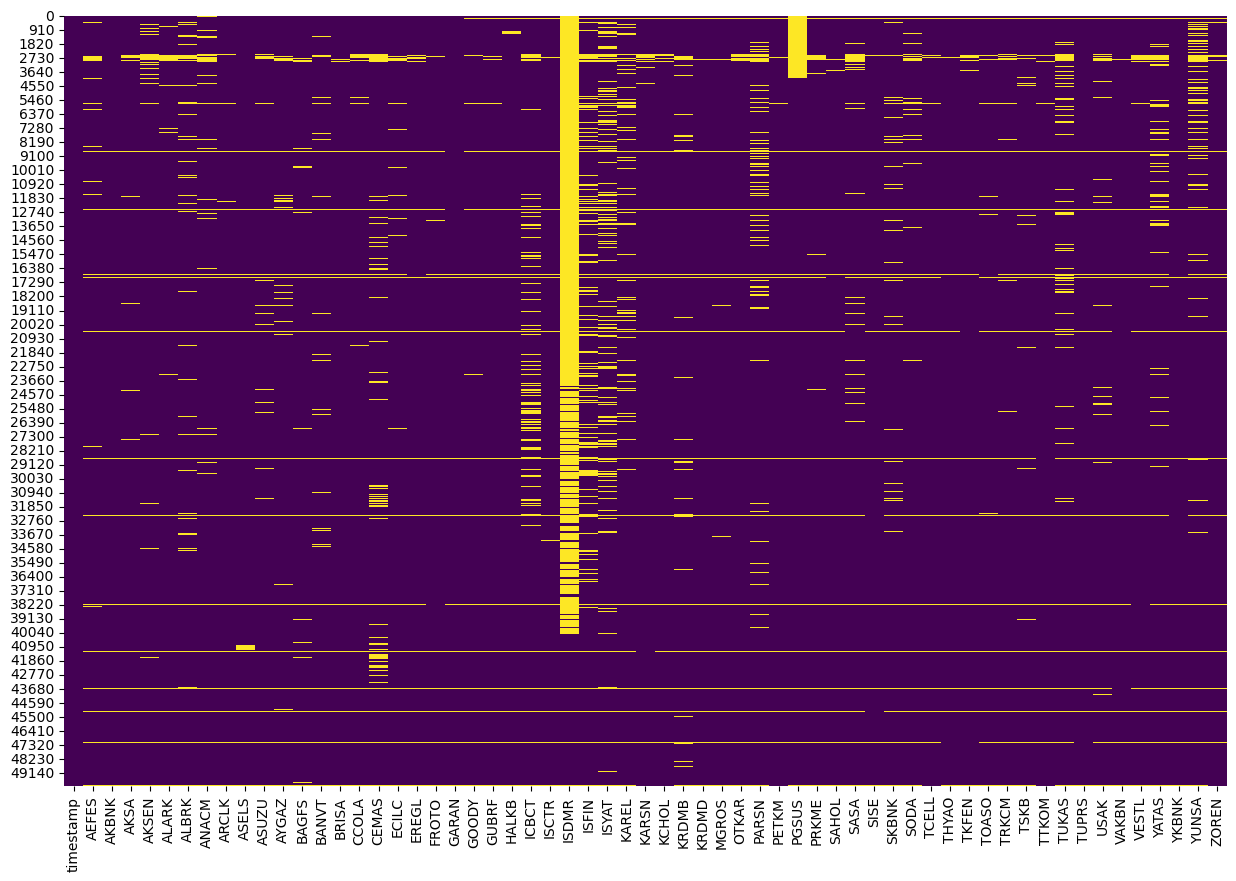

In [107]:
# Start understanding structure 3 - missing values - we have missing values ranging around 
# 2% to 5% per column yet there are exceptions like ISDMR. lets see their position
nan_matrix = df.isnull()
plt.figure(figsize=(15,10))
sns.heatmap(nan_matrix, cbar=False, cmap='viridis')
plt.show()

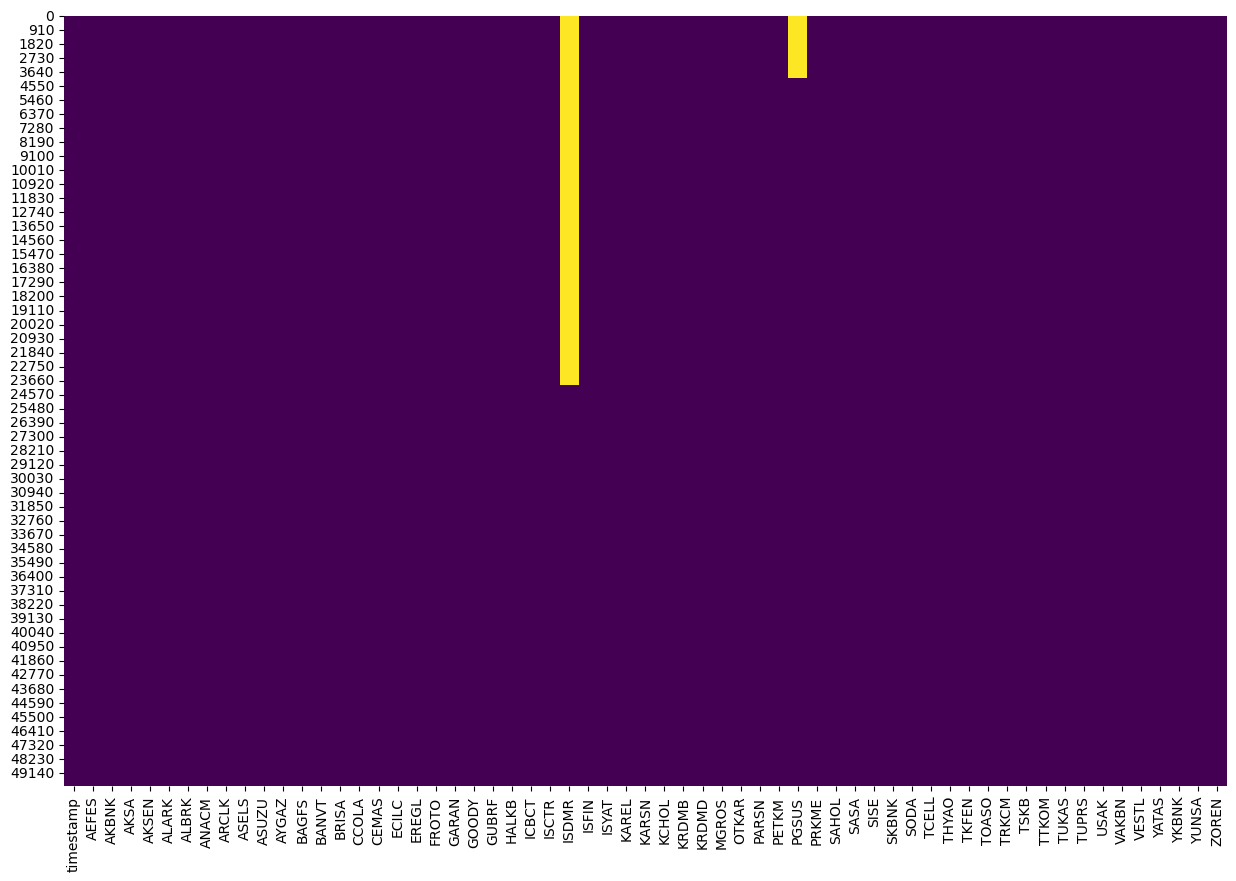

In [111]:
# Start understanding structure 3 - missing values - lets fill the values by interpolating and update parsed version as well
df = df.interpolate(method='linear', axis=0)
parsed_timestamp_df = df.drop(df.columns[0], axis = 1)
nan_matrix = df.isnull()
plt.figure(figsize=(15,10))
sns.heatmap(nan_matrix, cbar=False, cmap='viridis')
plt.show()

AEFES         AKBNK          AKSA         AKSEN         ALARK  \
count  50012.000000  50012.000000  50012.000000  50012.000000  50012.000000   
mean      20.999765      6.473033      7.098991      3.198649      2.058960   
std        2.487804      0.944306      2.721361      0.735249      0.573195   
min        0.000100      0.000100      0.000100      0.000000      0.000100   
25%       19.178300      5.850000      5.183100      2.680000      1.569200   
50%       20.671000      6.302300      6.978400      2.940000      1.937063   
75%       22.732000      6.931900      8.690000      3.790000      2.409500   
max       28.509000      9.212400     15.118900      5.190000      3.514300   

              ALBRK         ANACM         ARCLK         ASELS         ASUZU  \
count  50012.000000  50012.000000  50012.000000  50012.000000  50012.000000   
mean       1.366489      1.665100     15.374719     13.521743      6.450174   
std        0.167572      0.785623      4.533101      9.618629      2.192312   
min        1.025500      0.000100      0.000100      0.000100      0.000100   
25%        1.230000      1.047000     11.711100      4.986900      5.067400   
50%        1.363300      1.254900     14.986900      9.304250      5.930000   
75%        1.500900      2.387400     19.068900     22.816600      7.090000   
max        2.190000      3.502100     26.427800     46.761600     15.280000   

              AYGAZ         BAGFS         BANVT         BRISA         CCOLA  \
count  50012.000000  50012.000000  50012.000000  50012.000000  50012.000000   
mean       8.066140     10.392947      7.585731      6.546420     36.879707   
std        2.608643      3.604752      6.240489      1.294799      6.735998   
min        0.000100      0.000100      0.000000      0.000100      0.000100   
25%        5.922600      8.224100      2.580000      5.893800     31.978200   
50%        7.695400     10.610000      3.700000      6.730000     34.840300   
75%       10.225100     12.340000     11.910000      7.330000     42.004100   
max       13.593500     38.435200     28.680000     10.327500     54.220800   

              CEMAS         ECILC         EREGL         FROTO         GARAN  \
count  50012.000000  50012.000000  50012.000000  50012.000000  50012.000000   
mean       1.220327      2.064860      4.190049     32.753425      7.902257   
std        0.799952      0.973493      2.693558     14.762311      1.249090   
min        0.000000      0.000100      0.000100      0.000100      0.000100   
25%        0.700000      1.166200      2.201800     21.417900      7.020000   
50%        0.890000      1.803600      3.037900     27.108500      7.659900   
75%        1.530000      2.763200      6.806000     48.556500      8.680000   
max        7.010000      4.227800     10.471000     65.419200     12.155400   

              GOODY         GUBRF         HALKB         ICBCT         ISCTR  \
count  50012.000000  50012.000000  50012.000000  50012.000000  50012.000000   
mean       3.101909      4.326464     10.916680      2.727475      5.129005   
std        0.892034      1.224316      3.070512      1.741387      1.004176   
min        0.000100      0.000100      0.000100      0.000000      0.000100   
25%        2.427300      3.276500      8.710900      1.540000      4.321900   
50%        3.186100      4.247800     10.655900      2.000000      4.860000   
75%        3.595700      5.124900     13.490900      3.711250      5.826500   
max       58.757400     13.619100     20.236500     11.270000      7.963900   

              ISDMR         ISFIN         ISYAT         KAREL         KARSN  \
count  26057.000000  50012.000000  50012.000000  50012.000000  50012.000000   
mean       3.867774      1.457677      0.525442      3.088948      1.324861   
std        2.038660      1.683149      0.158571      2.104433      0.289648   
min        1.018100      0.000100      0.000100      0.000100      0.000100   
25%        1.804737      0.563900      0.436800      1.5220

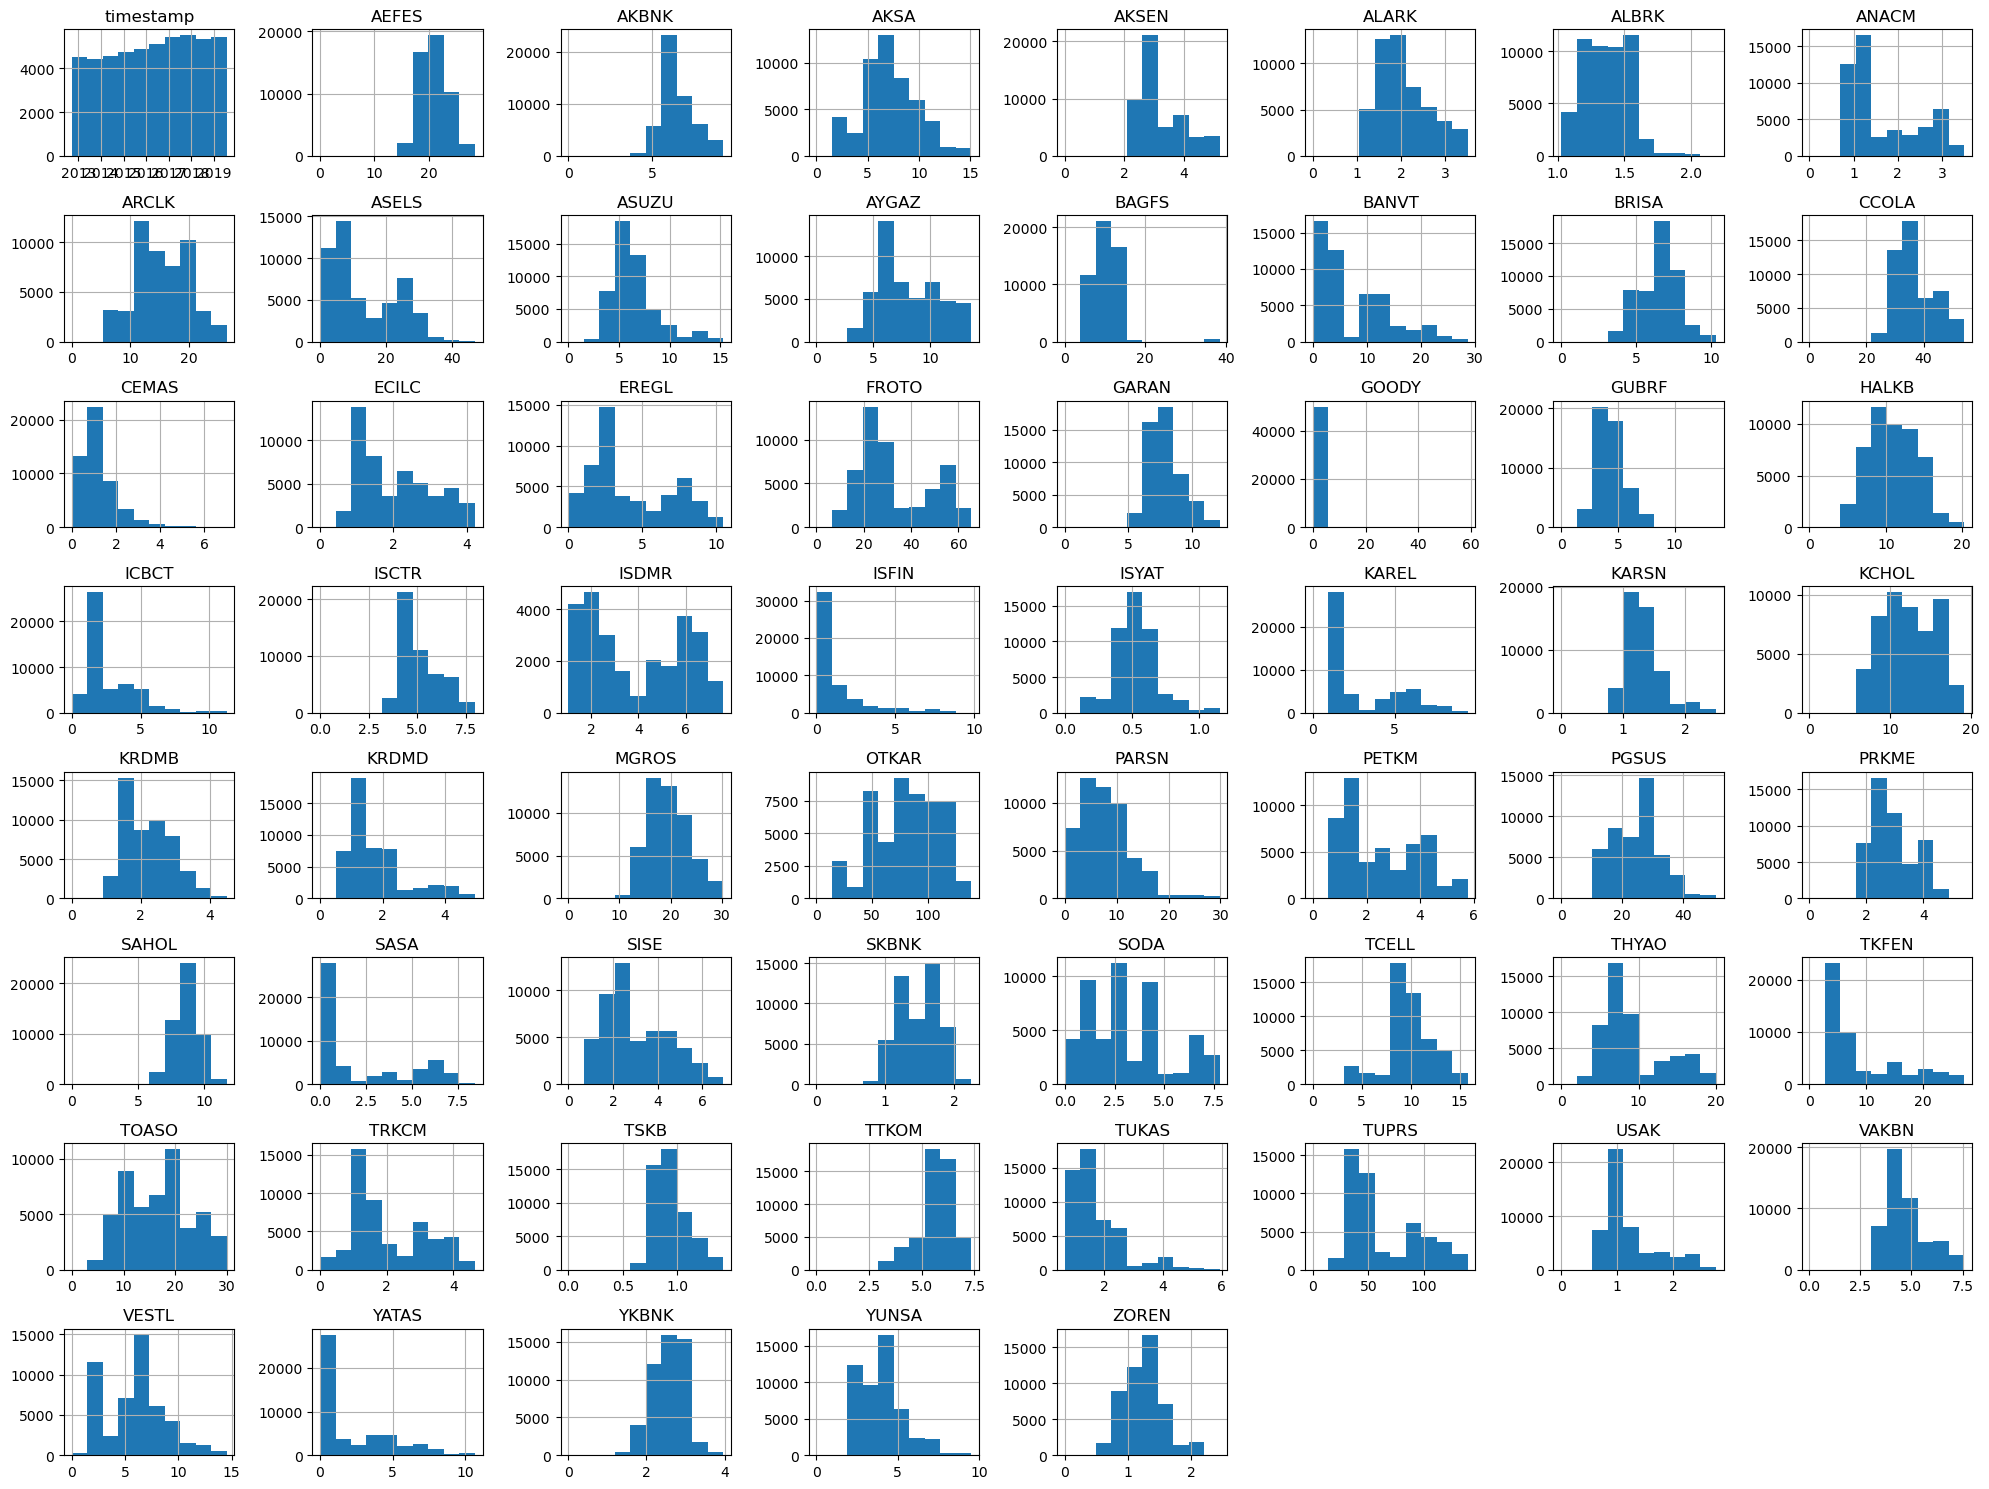

In [117]:
# Start understanding distribution - summary statistics and histograms
display(df.describe())
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

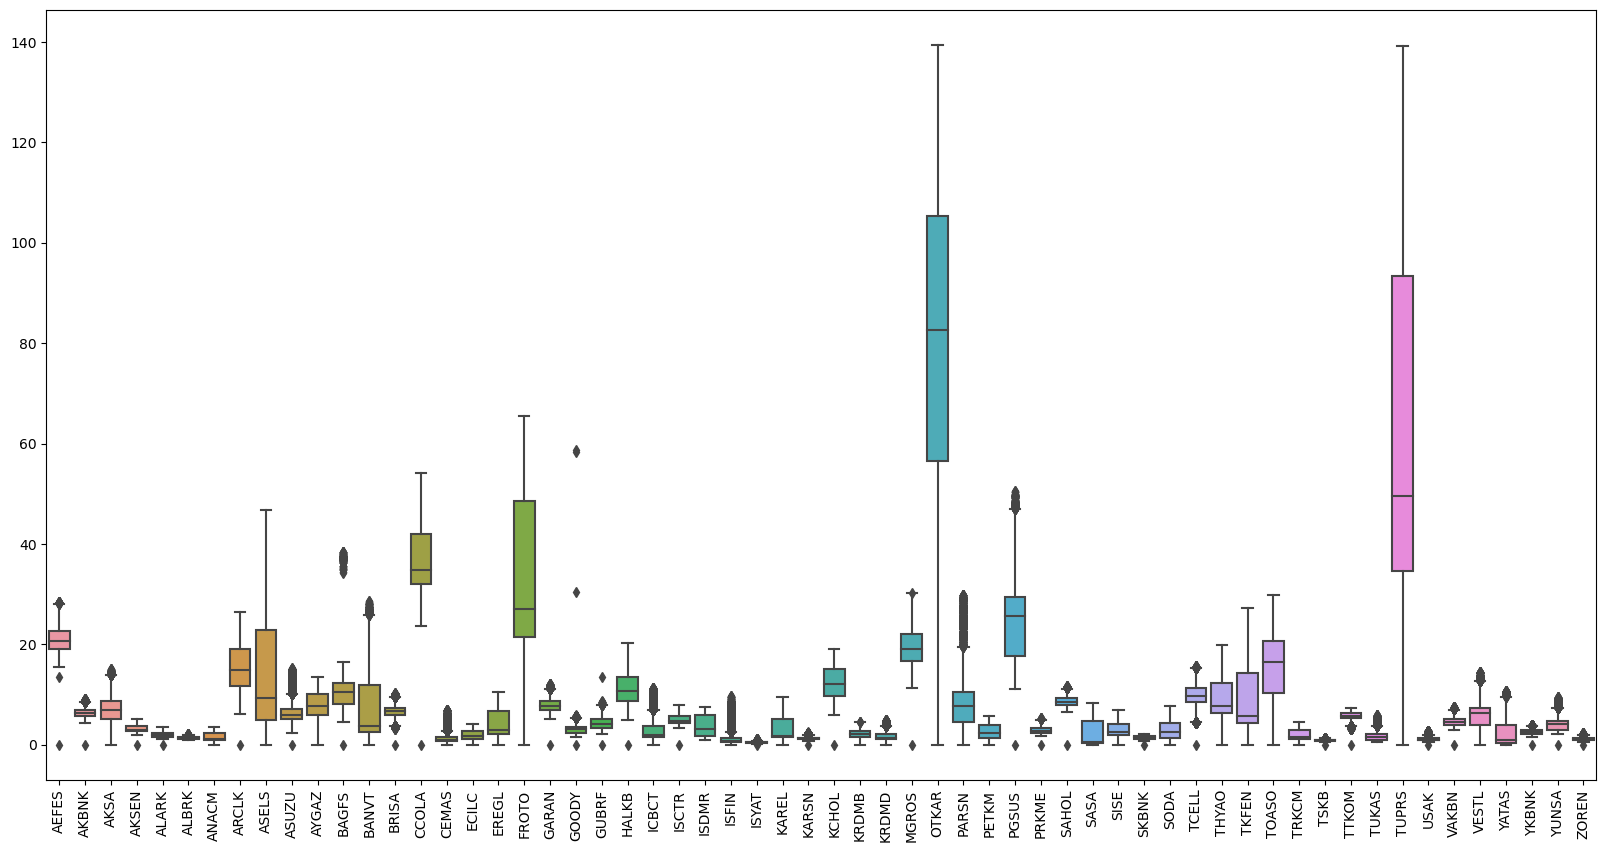

In [115]:
# Start understanding distribution - boxplots
plt.figure(figsize=(20,10))
sns.boxplot(data=df.iloc[:, 1:]) # if timestamp is the first column, exclude it
plt.xticks(rotation=90)
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


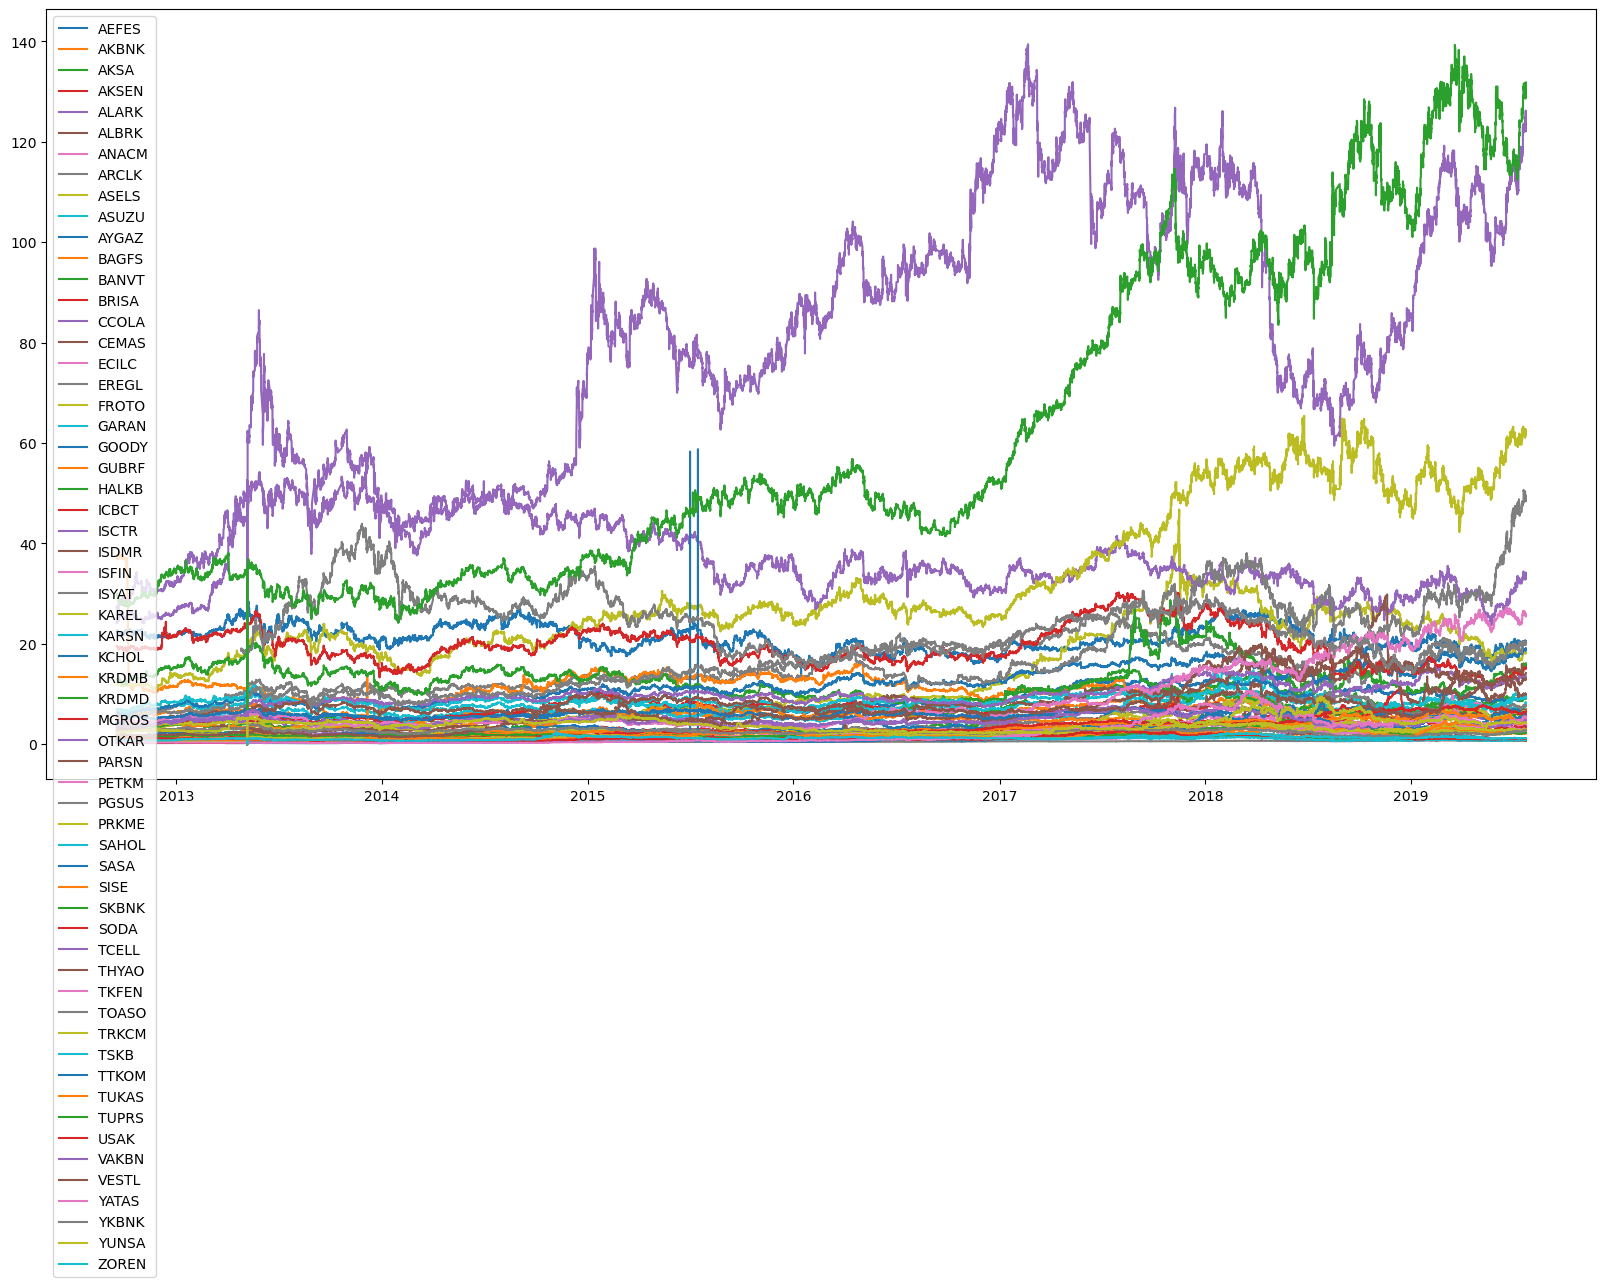

In [126]:
# We have some minimum values that are equal to zero. lets keep that in mind when we select stocks
# Start understanding patterns - time series
plt.figure(figsize=(20,10))
for column in df.columns[1:]:
    plt.plot(df['timestamp'], df[column], label=column)
plt.legend()
plt.show()

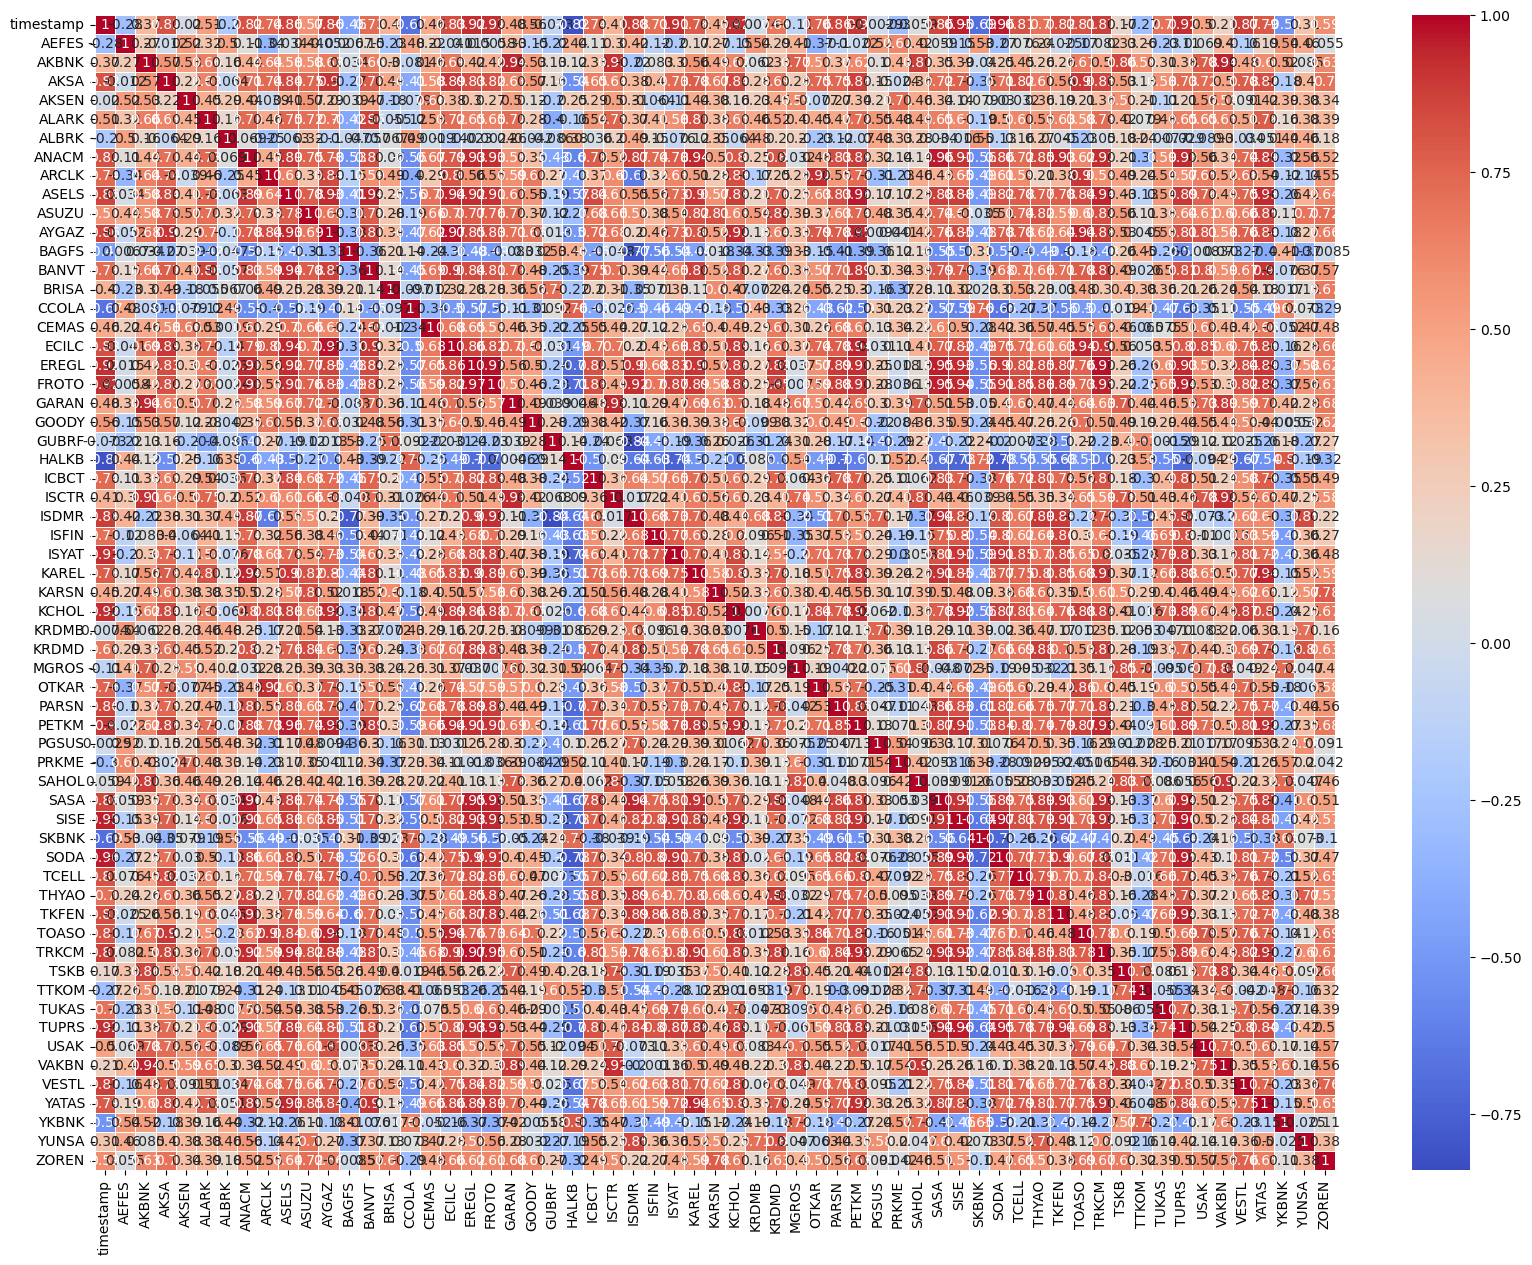

In [118]:
# we have some minimum values that are equal to zero. lets keep that in time
# Start understanding patterns - correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [301]:
# let me select 12 stocks from various industries, in some cases multiple stocks from the same industry
# I want to see what kind of results PCA gives with correlated and uncorrelated stocks
# Moving correlation - stock selection
stock_names = ['GARAN', 'AKBNK', 'YKBNK', 'TCELL', 'TTKOM', 'KRDMD', 'EREGL', 'PETKM', 'TUPRS', 'VESTL']
selected_stocks = df[stock_names]
print(selected_stocks)

        GARAN   AKBNK   YKBNK    TCELL   TTKOM   KRDMD   EREGL   PETKM  \
0      6.3715  5.2084  2.5438   4.5359  4.2639  0.7165  0.7914  0.7866   
1      6.3386  5.1938  2.5266   4.5153  4.2521  0.7165  0.7844  0.7829   
2      6.3386  5.2084  2.5266   4.5153  4.2521  0.7165  0.7914  0.7903   
3      6.3715  5.1938  2.5324   4.5359  4.2521  0.7104  0.7914  0.7903   
4      6.3715  5.2084  2.5324   4.5153  4.2521  0.7104  0.7914  0.7941   
...       ...     ...     ...      ...     ...     ...     ...     ...   
50007  9.8500  7.7300  2.7500  13.4500  5.6000  2.2800  7.6900  4.1000   
50008  9.8600  7.7200  2.7500  13.4300  5.5700  2.2800  7.6500  4.1000   
50009  9.8600  7.7400  2.7600  13.4600  5.5700  2.2800  7.6700  4.1000   
50010  9.8400  7.7000  2.7700  13.4300  5.5700  2.2800  7.6700  4.0900   
50011  9.8300  7.7000  2.7700  13.4000  5.5600  2.2700  7.6700  4.0900   

          TUPRS  VESTL  
0       29.8072   1.90  
1       29.7393   1.90  
2       29.6716   1.91  
3       29.

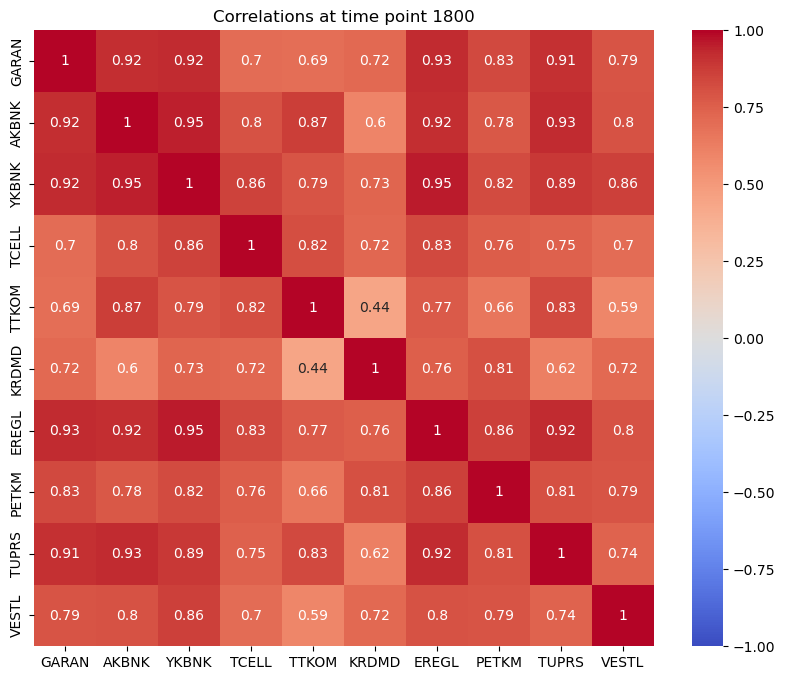

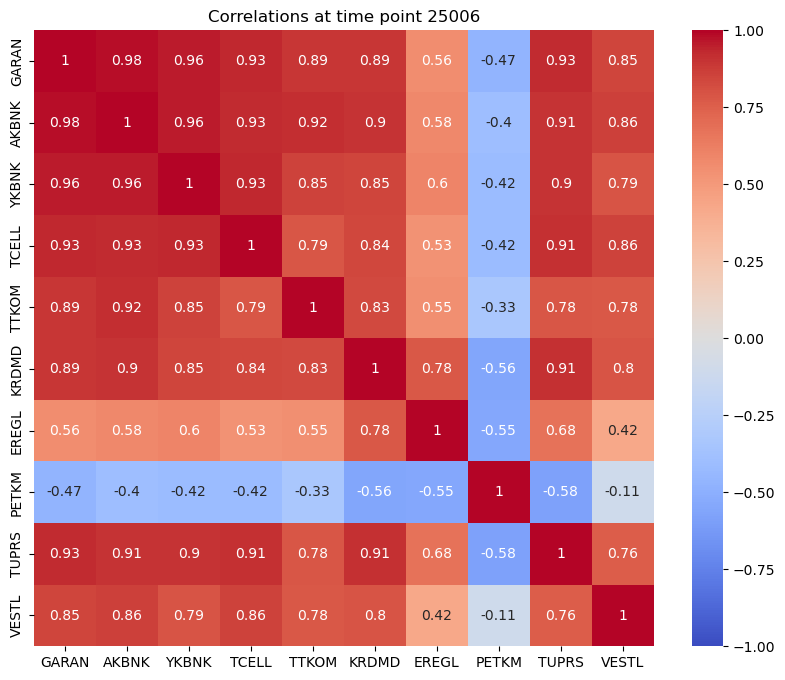

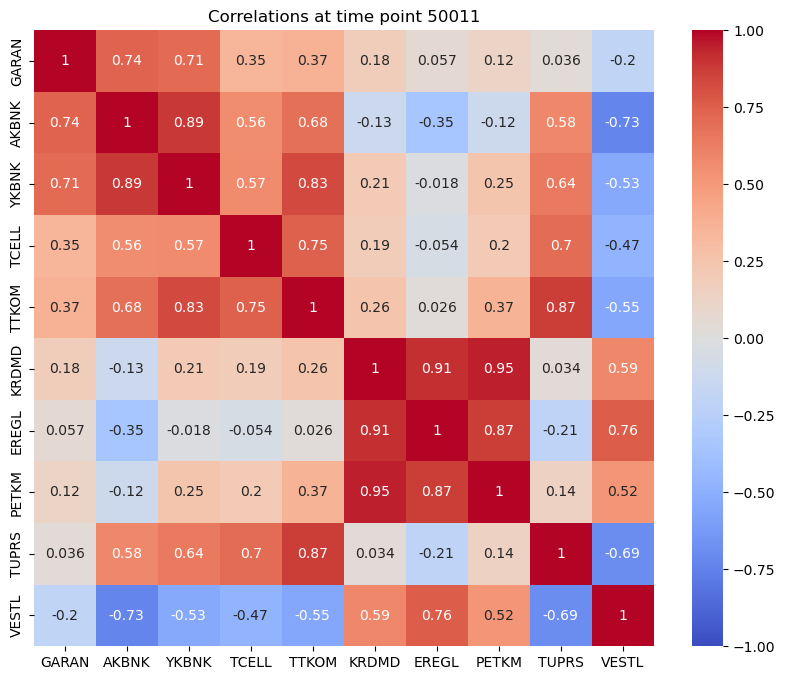

In [303]:
# Moving correlation - window selection - 7 hours in a day, 22 days in a month = 616 ~ used 600
window_size = 600
# Moving correlation - calculation
rolling_correlations = selected_stocks.rolling(window=window_size).corr(pairwise=True)
# Moving correlation - three point in time, beginning, some middle point and end
time_points = rolling_correlations.index.get_level_values(0).unique()
beginning = time_points[window_size*3]
middle = time_points[len(unique_time_points) // 2]
end = time_points[-1]

def plot_heatmap(time_point):
    corr_matrix = rolling_correlations.xs(time_point, level=0)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Correlations at time point {time_point}")
    plt.show()

plot_heatmap(beginning) 
plot_heatmap(middle)  
plot_heatmap(end)   



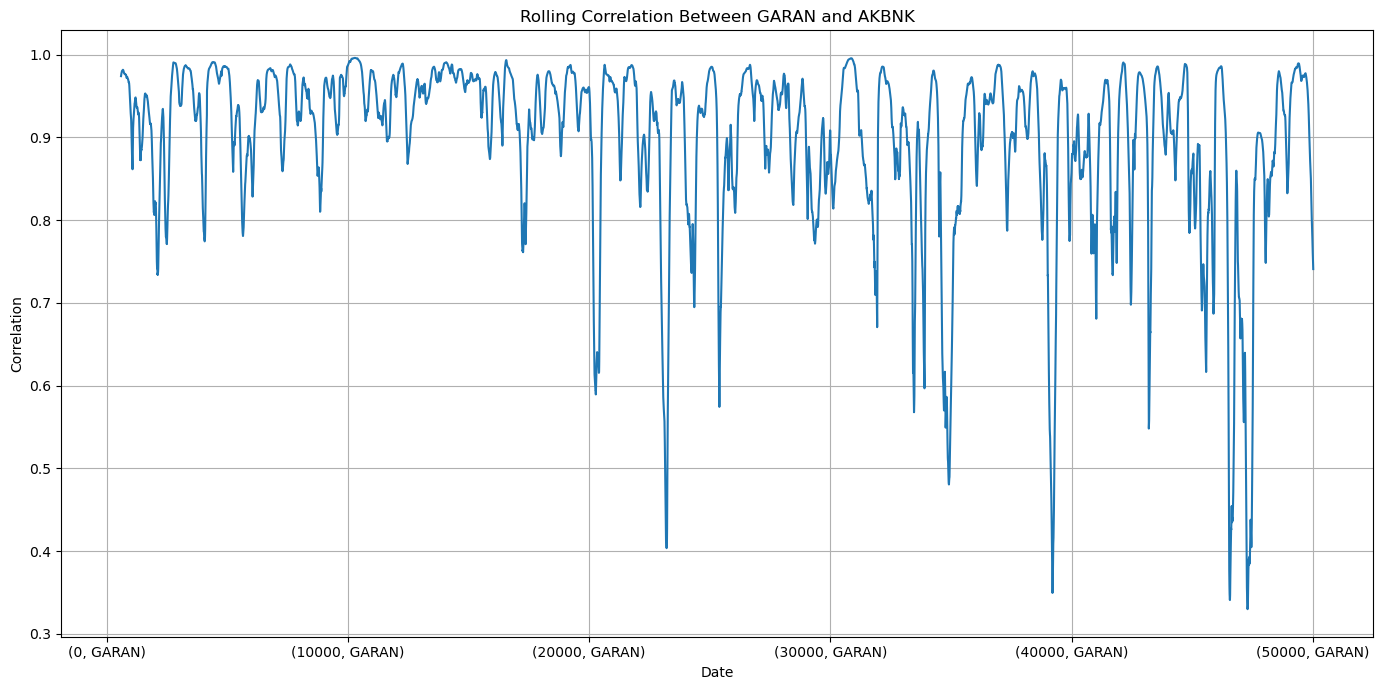

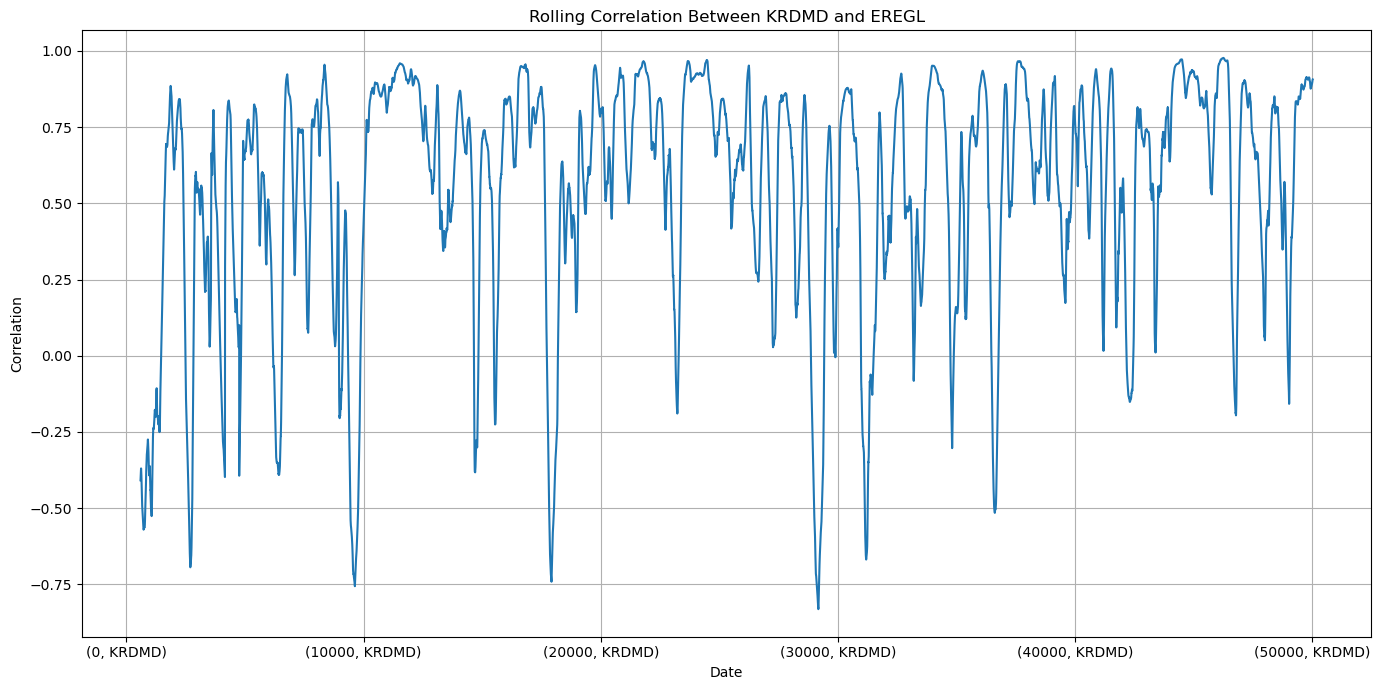

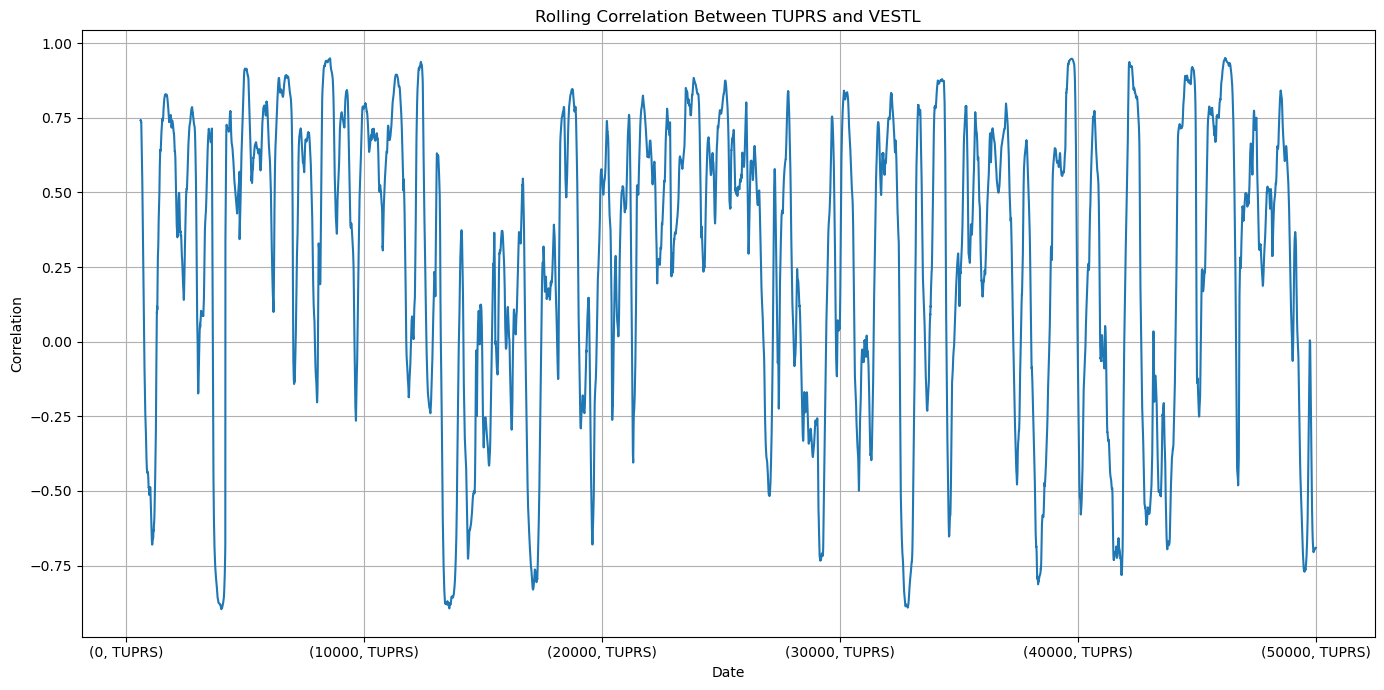

In [305]:
# For the stocks in the same industry correlation varied however it is limited.
# For example look at (Garan, Akbnk, Ykbnk) or (Krdmd, Eregl)
# For the stocks not in the same industry correlation varied significantly
# For example look at (Tuprs, Asels)
# Now I am curious to see a timeseries to see changes over time
# garan and akbnk combination over time:
rolling_corr_garan_akbnk = rolling_correlations.loc[pd.IndexSlice[:, 'GARAN'], 'AKBNK']
plt.figure(figsize=(14,7))
rolling_corr_garan_akbnk.plot()
plt.title("Rolling Correlation Between GARAN and AKBNK")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
# bagfs and gubrf combination over time:
rolling_corr_krdmd_eregl = rolling_correlations.loc[pd.IndexSlice[:, 'KRDMD'], 'EREGL']
plt.figure(figsize=(14,7))
rolling_corr_krdmd_eregl.plot()
plt.title("Rolling Correlation Between KRDMD and EREGL")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
# tuprs and asels combination over time:
rolling_corr_tuprs_vestl = rolling_correlations.loc[pd.IndexSlice[:, 'TUPRS'], 'VESTL']
plt.figure(figsize=(14,7))
rolling_corr_tuprs_vestl.plot()
plt.title("Rolling Correlation Between TUPRS and VESTL")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

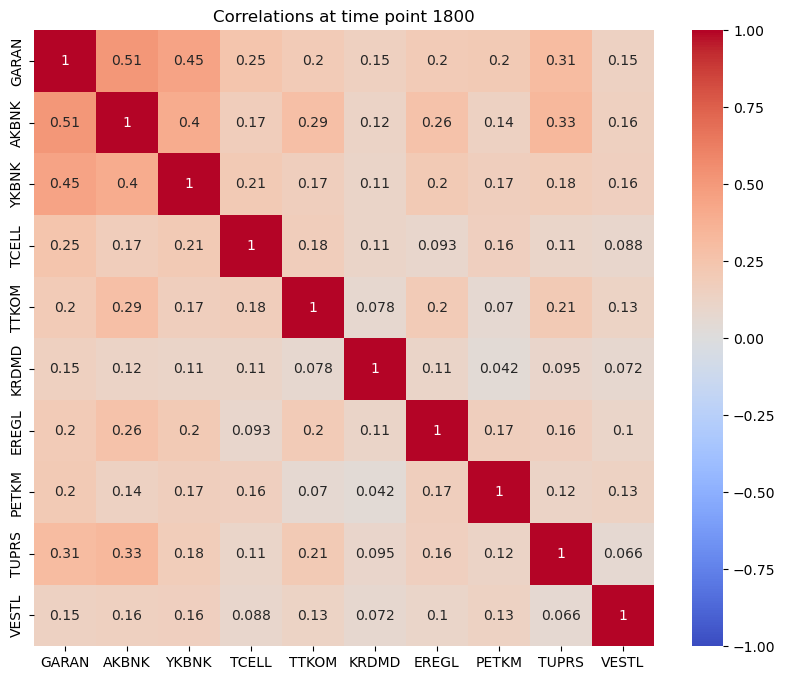

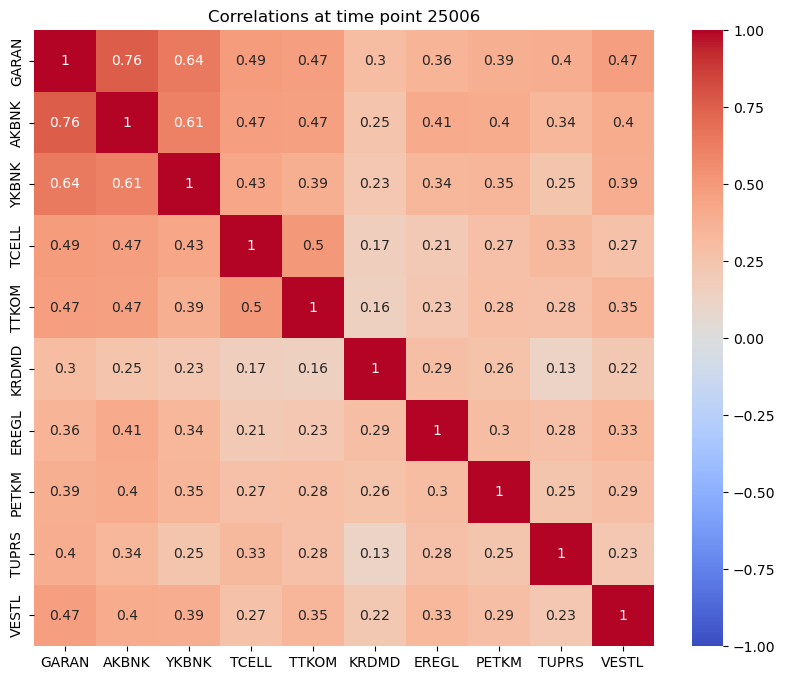

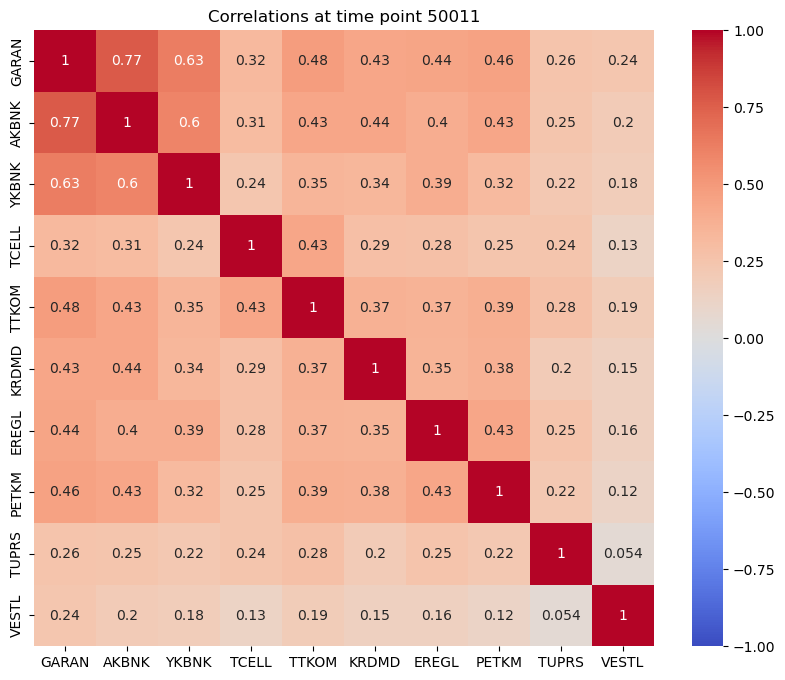

In [307]:
# correlation in banking is a bit tighter
# correlation in industrial is a bit loose
# still we see extreme highs and lows for stocks, even if they are in the same industry
# somehow we need to make data stationary.
# let me take time difference of stocks to ensure stationarity and do the analysis above again
differenced_stocks = selected_stocks.diff().dropna()
rolling_correlations = differenced_stocks.rolling(window=window_size).corr(pairwise=True)
plot_heatmap(beginning) 
plot_heatmap(middle)  
plot_heatmap(end) 

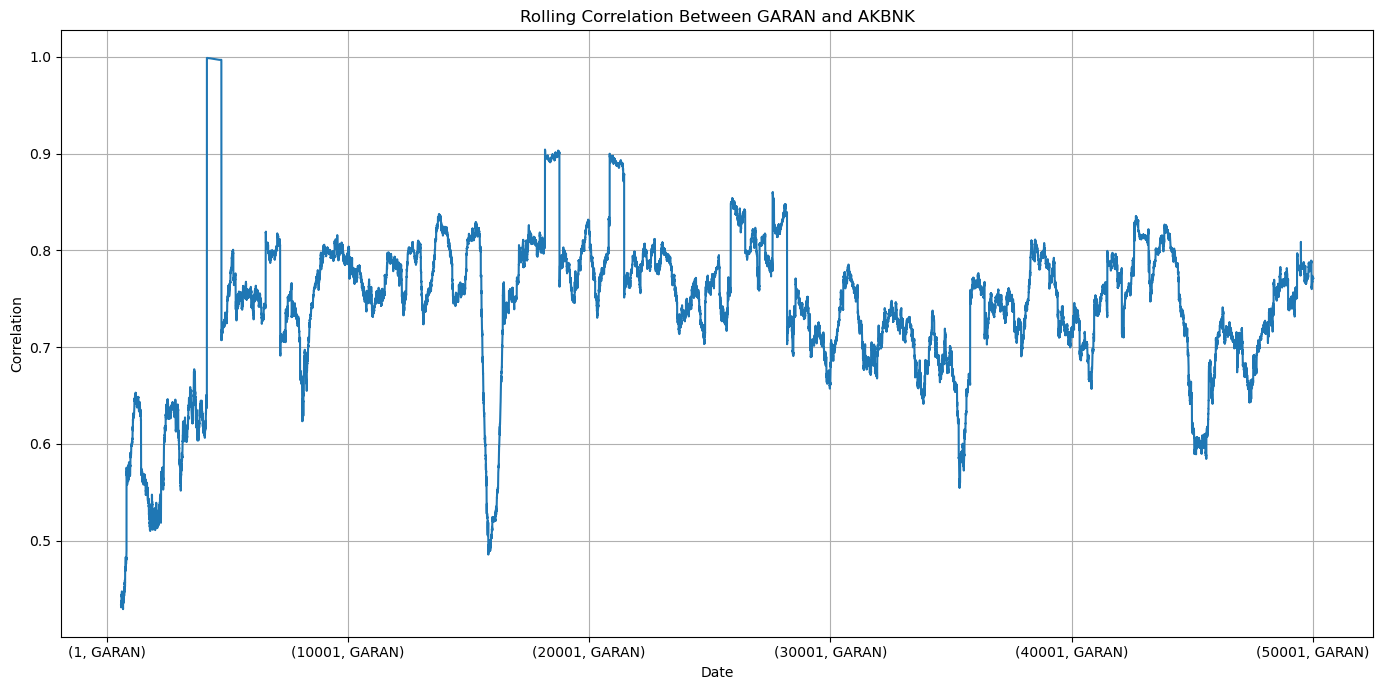

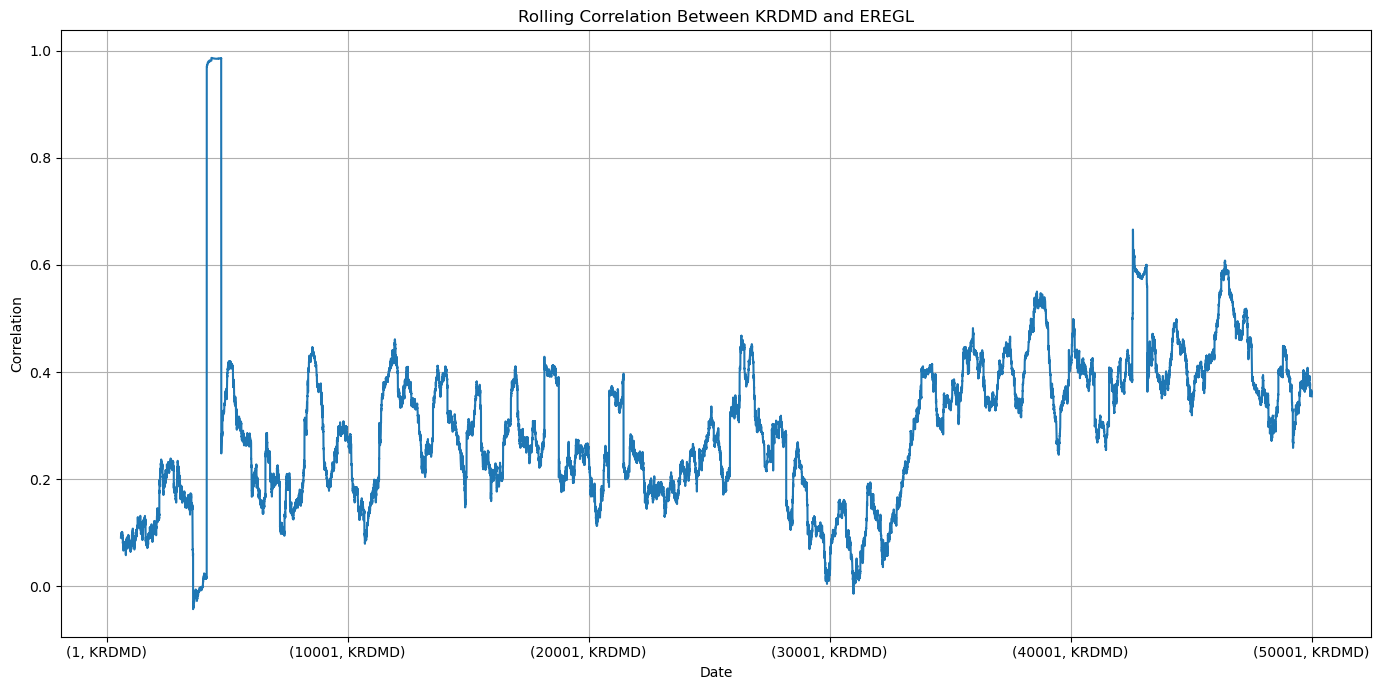

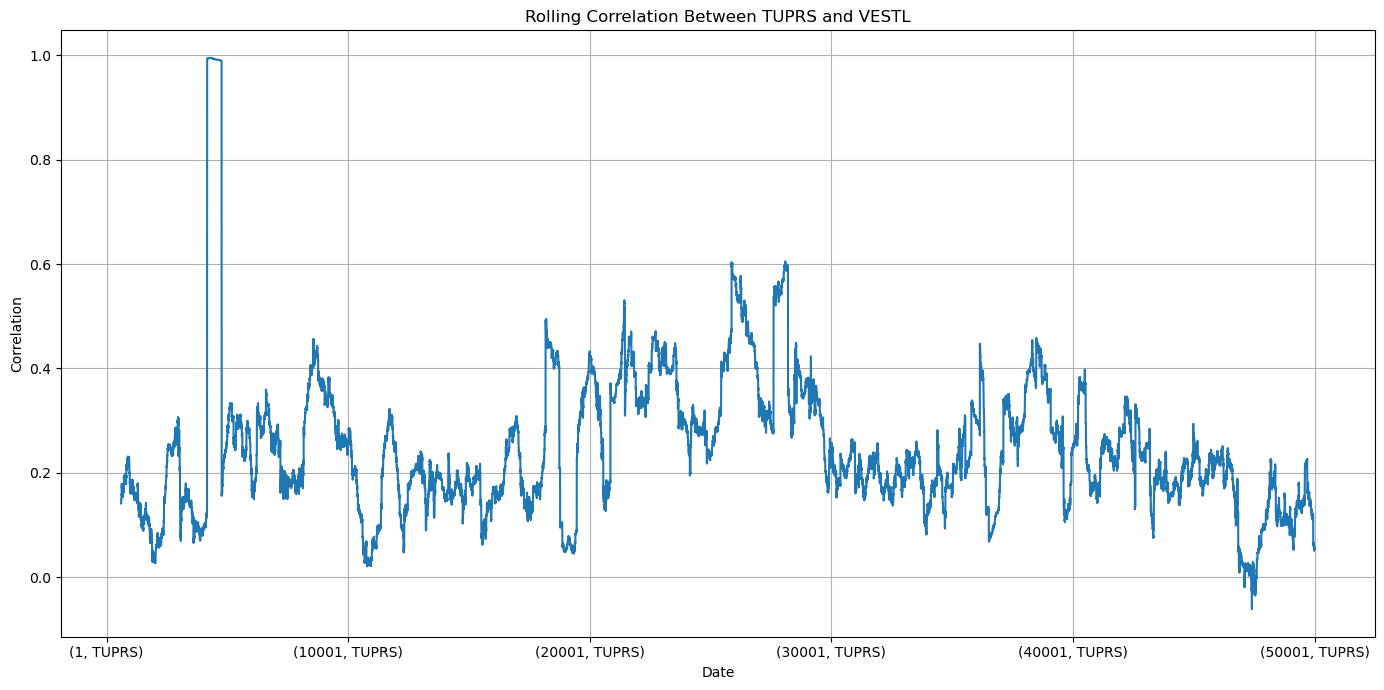

In [472]:
# let me look at time series to check stationarity
# garan and akbnk combination over time: 
rolling_corr_garan_akbnk = rolling_correlations.loc[pd.IndexSlice[:, 'GARAN'], 'AKBNK']
plt.figure(figsize=(14,7))
rolling_corr_garan_akbnk.plot()
plt.title("Rolling Correlation Between GARAN and AKBNK")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
# krdmd and eregl combination over time:
rolling_corr_krdmd_eregl = rolling_correlations.loc[pd.IndexSlice[:, 'KRDMD'], 'EREGL']
plt.figure(figsize=(14,7))
rolling_corr_krdmd_eregl.plot()
plt.title("Rolling Correlation Between KRDMD and EREGL")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
# tuprs and vestl combination over time:
rolling_corr_tuprs_vestl = rolling_correlations.loc[pd.IndexSlice[:, 'TUPRS'], 'VESTL']
plt.figure(figsize=(14,7))
rolling_corr_tuprs_vestl.plot()
plt.title("Rolling Correlation Between TUPRS and VESTL")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [313]:
# Looks more stationary now
# Calculate correlation matrix
correlation_matrix = differenced_stocks.corr()
display(correlation_matrix)

GARAN     AKBNK     YKBNK     TCELL     TTKOM     KRDMD     EREGL  \
GARAN  1.000000  0.949921  0.927242  0.764507  0.876966  0.666391  0.396921   
AKBNK  0.949921  1.000000  0.926040  0.766739  0.879081  0.656685  0.390477   
YKBNK  0.927242  0.926040  1.000000  0.755685  0.872589  0.638565  0.368674   
TCELL  0.764507  0.766739  0.755685  1.000000  0.739447  0.549194  0.364994   
TTKOM  0.876966  0.879081  0.872589  0.739447  1.000000  0.610872  0.357068   
KRDMD  0.666391  0.656685  0.638565  0.549194  0.610872  1.000000  0.455818   
EREGL  0.396921  0.390477  0.368674  0.364994  0.357068  0.455818  1.000000   
PETKM  0.655919  0.648716  0.627574  0.549361  0.603661  0.569310  0.420360   
TUPRS  0.705607  0.704287  0.693180  0.599329  0.675198  0.533062  0.365844   
VESTL  0.451847  0.443262  0.425791  0.371744  0.403853  0.393900  0.305980   

          PETKM     TUPRS     VESTL  
GARAN  0.655919  0.705607  0.451847  
AKBNK  0.648716  0.704287  0.443262  
YKBNK  0.627574  0.693180  0.425791  
TCELL  0.549361  0.599329  0.371744  
TTKOM  0.603661  0.675198  0.403853  
KRDMD  0.569310  0.533062  0.393900  
EREGL  0.420360  0.365844  0.305980  
PETKM  1.000000  0.531551  0.402220  
TUPRS  0.531551  1.000000  0.364741  
VESTL  0.402220  0.364741  1.000000

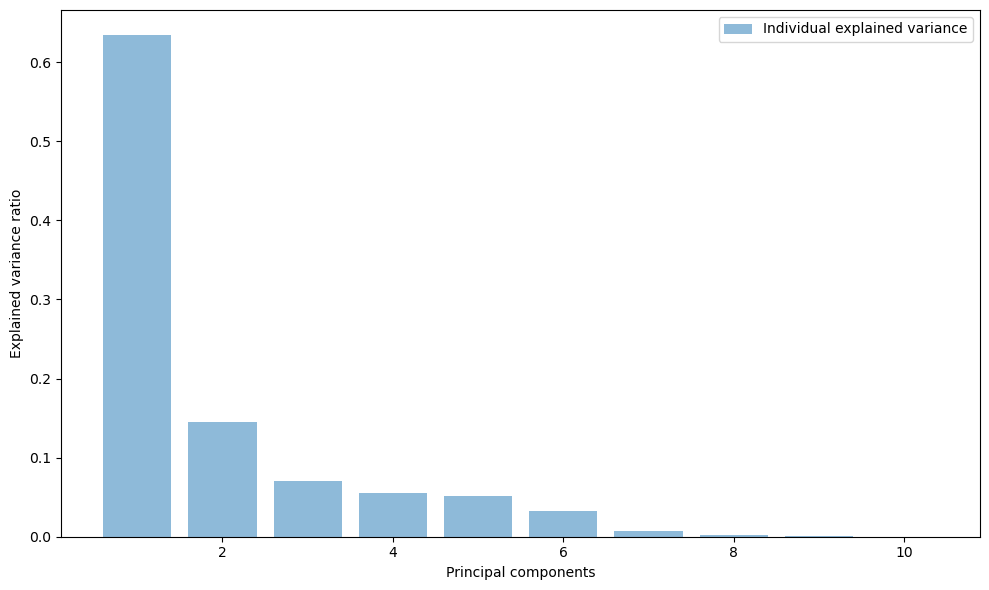

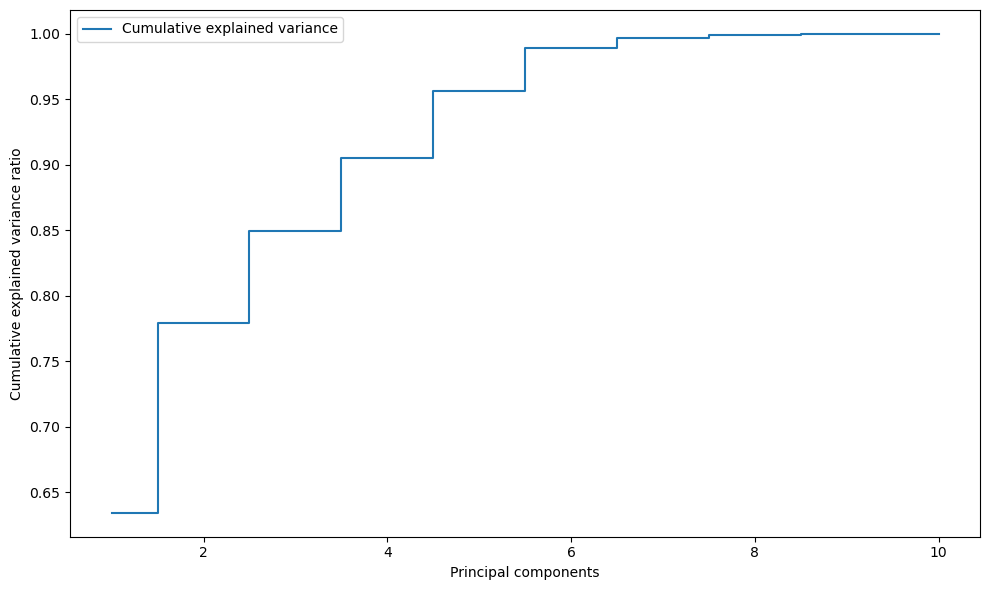

In [333]:
# Calculate correlation matrix
pca = PCA()
pca.fit(correlation_matrix)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [331]:
# Aiming to capture 95% of the variance so going to move with 5 components
components = 5
pca_opt = PCA(components)
principal_components = pca_opt.fit_transform(correlation_matrix)
pc_df = pd.DataFrame(data=principal_components, columns=[f"Principal Component {i}" for i in range(1, components + 1)])
explained_variance = pca_opt.explained_variance_ratio_
print(f"Explained variance for each component: {explained_variance}")
print(pc_df)

Explained variance for each component: [0.63412451 0.14506967 0.07051866 0.05570385 0.05113044]
   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -0.446413               0.013542               0.003487   
1              -0.448004               0.013773              -0.006821   
2              -0.432381               0.020839              -0.022524   
3              -0.182885              -0.004732              -0.130479   
4              -0.379656               0.018568              -0.047819   
5               0.137701              -0.130967               0.241272   
6               0.899229              -0.408735              -0.143855   
7               0.144749              -0.061917               0.323292   
8              -0.047919              -0.017699              -0.198764   
9               0.755579               0.557328              -0.017789   

   Principal Component 4  Principal Component 5  
0              -0.053235              -

In [342]:
# PCA 1 looks like seperation of banking and telecommunication sector from the rest and especially from technology
# PCA 2 looks like seperation of iron and steel sector from the rest and especially from technology
# PCA 4 looks like separation of energy sector from the rest

In [430]:
# read google trends data from anaconda cloud, just first 10 rows to see if it works
# if I download more than 12 months of trends data, google trends provide the data in months, that is why I am limiting the period with 12 months
# maybe later I can pull the data through API
file_name = 'multiTimeline (3).csv'
trends = pd.read_csv(file_name, delimiter=',', skiprows=1)
trends['Week'] = pd.to_datetime(trends['Week'])
display(trends.head())


Week  tüpraş: (Türkiye)  tüpraş hisse: (Türkiye)  \
0 2018-07-29                 62                       12   
1 2018-08-05                 54                       21   
2 2018-08-12                 65                       21   
3 2018-08-19                 43                        3   
4 2018-08-26                 82                        8   

   tüpraş borsa: (Türkiye)  IST TUPRS: (Türkiye)  TUPRS: (Türkiye)  
0                        6                     0                10  
1                        5                     0                20  
2                        4                     1                17  
3                        0                     0                 4  
4                        3                     3                11

In [432]:
# slices tupras yet received an error saying df might be affected, so created a copy for the slice then merged with google trends data
tupras = df[['timestamp', 'TUPRS']].copy()
tupras['timestamp'] = tupras['timestamp'].dt.tz_localize(None)
tupras.set_index('timestamp', inplace=True)
weekly_avg_tuprs = tupras.resample('W').mean().reset_index()
merged_tupras = weekly_avg_tuprs.merge(trends, left_on='timestamp', right_on='Week', how='inner')
display(merged_tupras)

timestamp       TUPRS       Week  tüpraş: (Türkiye)  \
0  2018-07-29   93.790785 2018-07-29                 62   
1  2018-08-05   96.481615 2018-08-05                 54   
2  2018-08-12   94.438693 2018-08-12                 65   
3  2018-08-19  107.122541 2018-08-19                 43   
4  2018-08-26  109.350308 2018-08-26                 82   
5  2018-09-02  107.887585 2018-09-02                 70   
6  2018-09-09  109.635110 2018-09-09                 66   
7  2018-09-16  114.940775 2018-09-16                 57   
8  2018-09-23  117.481858 2018-09-23                 54   
9  2018-09-30  121.099080 2018-09-30                 49   
10 2018-10-07  119.705243 2018-10-07                 70   
11 2018-10-14  123.710780 2018-10-14                 69   
12 2018-10-21  124.264020 2018-10-21                 52   
13 2018-10-28  118.523692 2018-10-28                 52   
14 2018-11-04  114.754028 2018-11-04                 75   
15 2018-11-11  117.572665 2018-11-11                 51   
16 2018-11-18  108.780285 2018-11-18                 39   
17 2018-11-25  109.358799 2018-11-25                 43   
18 2018-12-02  109.475294 2018-12-02                 41   
19 2018-12-09  112.483309 2018-12-09                 34   
20 2018-12-16  109.822307 2018-12-16                 45   
21 2018-12-23  109.262689 2018-12-23                 39   
22 2018-12-30  104.310698 2018-12-30                 27   
23 2019-01-06  103.277273 2019-01-06                 37   
24 2019-01-13  106.569909 2019-01-13                 43   
25 2019-01-20  109.814765 2019-01-20                 43   
26 2019-01-27  119.207547 2019-01-27                 43   
27 2019-02-03  123.117458 2019-02-03                 61   
28 2019-02-10  123.924902 2019-02-10                 62   
29 2019-02-17  128.500774 2019-02-17                 52   
30 2019-02-24  127.989770 2019-02-24                 53   
31 2019-03-03  129.051462 2019-03-03                 47   
32 2019-03-10  130.070409 2019-03-10                 48   
33 2019-03-17  131.938696 2019-03-17                 50   
34 2019-03-24  134.421098 2019-03-24                 62   
35 2019-03-31  129.810285 2019-03-31                 41   
36 2019-04-07  132.201572 2019-04-07                 44   
37 2019-04-14  132.025625 2019-04-14                 62   
38 2019-04-21  129.960000 2019-04-21                 44   
39 2019-04-28  124.811328 2019-04-28                 47   
40 2019-05-05  124.546484 2019-05-05                 56   
41 2019-05-12  120.023438 2019-05-12                 65   
42 2019-05-19  119.665723 2019-05-19                 57   
43 2019-05-26  118.929375 2019-05-26                 68   
44 2019-06-02  121.222813 2019-06-02                 38   
45 2019-06-09  126.421591 2019-06-09                 49   
46 2019-06-16  122.579063 2019-06-16                 53   
47 2019-06-23  118.106875 2019-06-23                 76   
48 2019-06-30  114.290566 2019-06-30                100   
49 2019-07-07  115.996563 2019-07-07                 87   
50 2019-07-14  117.571875 2019-07-14                 84   
51 2019-07-21  127.450000 2019-07-21                 75   

    tüpraş hisse: (Türkiye)  tüpraş borsa: (Türkiye)  IST TUPRS: (Türkiye)  \
0                        12                        6                     0   
1                        21                        5                     0   
2                        21                        4                     1   
3                         3                        0                     0   
4                         8                        3                     3   
5                        13                        1                     0   
6                        14                        3                     0   
7                        12                        1                     1   
8                        16                        2                     1   
9                        13                        3                     0   
10                

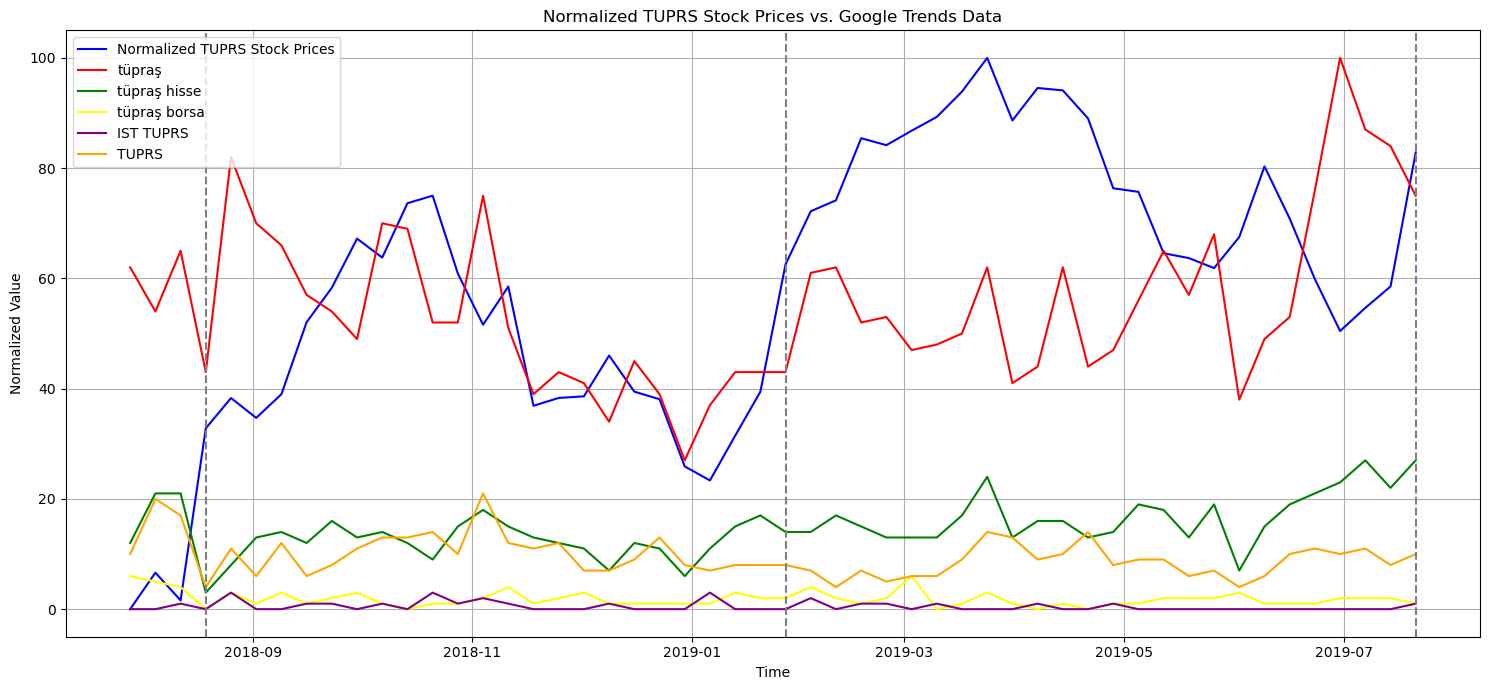

In [470]:
# adding a price change tracker condition: stock price increases more than 2.5% and any of trend item increases more than 2.5%
# scaling trends data between 0 - 100 just like trends data then plotting
scaler = MinMaxScaler(feature_range=(0, 100))

def check_pct_change(df, column_name):
    return df[column_name].pct_change() > 0.05

trend_columns = ['tüpraş: (Türkiye)', 'tüpraş hisse: (Türkiye)', 'tüpraş borsa: (Türkiye)', 'IST TUPRS: (Türkiye)', 'TUPRS: (Türkiye)']

merged_tupras['price_increase'] = merged_tupras['TUPRS'].pct_change() > 0.05

for column in trend_columns:
    merged_tupras[f'{column}_increase'] = check_pct_change(merged_tupras, column)

merged_tupras['any_trend_increase'] = merged_tupras[[f'{column}_increase' for column in trend_columns]].any(axis=1)

merged_tupras['highlight_condition'] = merged_tupras['price_increase'] & merged_tupras['any_trend_increase']
merged_tupras['TUPRS_scaled'] = scaler.fit_transform(merged_tupras[['TUPRS']])

plt.figure(figsize=(15, 7))
plt.plot(merged_tupras['timestamp'], merged_tupras['TUPRS_scaled'], label='Normalized TUPRS Stock Prices', color='blue')
plt.plot(merged_tupras['timestamp'], merged_tupras['tüpraş: (Türkiye)'], label='tüpraş', color='red')
plt.plot(merged_tupras['timestamp'], merged_tupras['tüpraş hisse: (Türkiye)'], label='tüpraş hisse', color='green')
plt.plot(merged_tupras['timestamp'], merged_tupras['tüpraş borsa: (Türkiye)'], label='tüpraş borsa', color='yellow')
plt.plot(merged_tupras['timestamp'], merged_tupras['IST TUPRS: (Türkiye)'], label='IST TUPRS', color='purple')
plt.plot(merged_tupras['timestamp'], merged_tupras['TUPRS: (Türkiye)'], label='TUPRS', color='orange') 

for i, row in merged_tupras.iterrows():
    if row['price_increase']:
        plt.axvline(x=row['timestamp'], color='grey', linestyle='--')

plt.title('Normalized TUPRS Stock Prices vs. Google Trends Data')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [454]:
parsed_merged_tupras = merged_tupras.drop('Week', axis=1)
parsed_merged_tupras = parsed_merged_tupras.drop('timestamp', axis=1)
trends_correlations = parsed_merged_tupras.rolling(window=6).corr(pairwise=True)
display(trends_correlations)

TUPRS  tüpraş: (Türkiye)  \
0  TUPRS                         NaN                NaN   
   tüpraş: (Türkiye)             NaN                NaN   
   tüpraş hisse: (Türkiye)       NaN                NaN   
   tüpraş borsa: (Türkiye)       NaN                NaN   
   IST TUPRS: (Türkiye)          NaN                NaN   
...                              ...                ...   
51 tüpraş hisse: (Türkiye)  0.131337           0.473842   
   tüpraş borsa: (Türkiye) -0.763396           0.779650   
   IST TUPRS: (Türkiye)     0.820043          -0.130101   
   TUPRS: (Türkiye)        -0.039166          -0.058183   
   TUPRS_scaled             1.000000          -0.669174   

                            tüpraş hisse: (Türkiye)  tüpraş borsa: (Türkiye)  \
0  TUPRS                                        NaN                      NaN   
   tüpraş: (Türkiye)                            NaN                      NaN   
   tüpraş hisse: (Türkiye)                      NaN                      NaN   
   tüpraş borsa: (Türkiye)                      NaN                      NaN   
   IST TUPRS: (Türkiye)                         NaN                      NaN   
...                                             ...                      ...   
51 tüpraş hisse: (Türkiye)                 1.000000                 0.280828   
   tüpraş borsa: (Türkiye)                 0.280828                 1.000000   
   IST TUPRS: (Türkiye)                    0.577714                -0.447214   
   TUPRS: (Türkiye)                        0.224662                -0.333333   
   TUPRS_scaled                            0.131337                -0.763396   

                            IST TUPRS: (Türkiye)  TUPRS: (Türkiye)  \
0  TUPRS                                     NaN               NaN   
   tüpraş: (Türkiye)                         NaN               NaN   
   tüpraş hisse: (Türkiye)                   NaN               NaN   
   tüpraş borsa: (Türkiye)                   NaN               NaN   
   IST TUPRS: (Türkiye)                      NaN               NaN   
...                                          ...               ...   
51 tüpraş hisse: (Türkiye)          5.777144e-01      2.246624e-01   
   tüpraş borsa: (Türkiye)         -4.472136e-01     -3.333333e-01   
   IST TUPRS: (Türkiye)             1.000000e+00      5.958082e-16   
   TUPRS: (Türkiye)                 5.958082e-16      1.000000e+00   
   TUPRS_scaled                     8.200428e-01     -3.916619e-02   

                            TUPRS_scaled  
0  TUPRS                             NaN  
   tüpraş: (Türkiye)                 NaN  
   tüpraş hisse: (Türkiye)           NaN  
   tüpraş borsa: (Türkiye)           NaN  
   IST TUPRS: (Türkiye)              NaN  
...                                  ...  
51 tüpraş hisse: (Türkiye)      0.131337  
   tüpraş borsa: (Türkiye)     -0.763396  
   IST TUPRS: (Türkiye)         0.820043  
   TUPRS: (Türkiye)            -0.039166  
   TUPRS_scaled                 1.000000  

[364 rows x 7 columns]

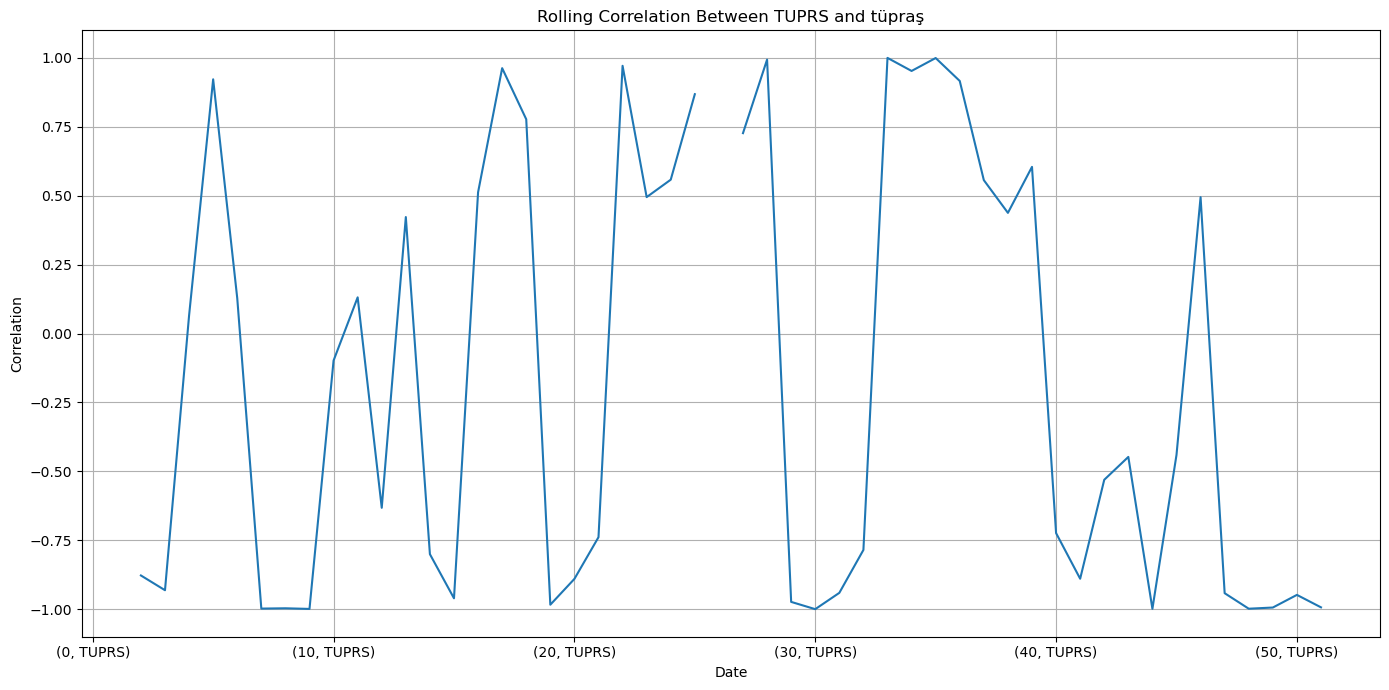

In [450]:
trends_correlation_TUPRS_tüpraş = trends_correlations.loc[pd.IndexSlice[:, 'TUPRS'], 'tüpraş: (Türkiye)']
plt.figure(figsize=(14,7))
trends_correlation_TUPRS_tüpraş.plot()
plt.title("Rolling Correlation Between TUPRS and tüpraş")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
